# Éffectuer une prédiction de revenus

In [2]:
# Importation librairies et modules
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.lines as mlines
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

<div class ="alert alert-block alert-info">

<a id='sommaire'></a>
## [Mission 1](#miss1)
* [Analyse, choix des données et pré-traitement](#Adata)
    * [ Pré-raitement des données problèmatiques issues de l'analyse](#traitData)
        * [Création de la variable population](#pop)
        * [Calcul du pourcentage de la population mondiale couverte par l'étude](#prct)
      
## [Mission 2](#miss2)
* [Préparation des données](#prepData)
* [Données numériques des revenus moyens pour les pays choisis](#dataNum2)
* [Visualisation de la distribution des revenus moyens dans les pays choisis](#visDistrib2)
* [Visualisation des revenus par quantile des pays selectionnés](#visQuantRev2)
* [Visualisation courbes de Lorenz des pays selectionés](#visLrnz2)
* [Préparation des données pour l'évolution des indices de Gini au fil des ans](#prepEvoGini)
* [Selection des pays pour l'évolution de l'indice de Gini au fil des ans](#selectPayEvoGini)
* [Visualisation de l'évolution des indices de Gini au fil des ans](#visPayEvoGini)
* [Calcul de l'indice de Gini à partir de la table Worlde income distribution](#calcIndGiniW)
* [Classement des pays par indice de Gini](#classPayIndGini)
* [Moyenne de l'indice de Gini](#MoyIndGini)
* [Les 5 pays ayant l'indice de Gini le plus élevé](#5maxMoyIndGini)
* [Les 5 pays ayant l'indice de Gini le plus faibles](#5minMoyIndGini)
* [Position de la France](#frPosIndGini)

## [ Mission 3](#Miss3)    
* [Nettoyage et préparation des données](#prepData3)
* [Question 1 à 3 ](#Q1à3)
* [Question 4 ](#Q4)
* [Question 5 ](#Q5)
* [Question 6 ](#Q6)
* [Question 7 ](#Q7)
* [Question 8 ](#Q8)
* [Question 9 à 11](#Q9à11) 
    
## [Mission 4](#Miss4)
* [ANOVA avec comme variable explicative  le pays de l’individu ](#ANOVA)
* [Régression linéaire multiple avec comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu](#REGMULTI)
    * [Analyse du modèle](#REGMULTIANALYS)
        * [Décomposition de la variance totale expliquée par l'indice de gini, le revenu moyen par pays](#decomp1)
        * [Décomposition de la variance totale expliquée par les autres facteurs non considérés dans le modèle](#decomp2)
* [Régression linéaire multiple avec en plus le quantile parent](#REGMULTIQ)
    * [Analyse du modèle](#REGMULTIANALYS2)
* [QUESTION: En observant le coefficient de régression associé à l’indice de Gini, peut-on affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise ?](#M4Q)
    * [Décomposition de la variance total expliqué par le pays de naissance et le revenu des individus](#decomp3)
    * [Décomposition de la variance totale expliquée par les autres facteurs non considérés dans le modèle](#decomp4)
</div>

<div class ="alert alert-block alert-warning">

**Note :**
    
Ce projet ne traite que de la construction et de l'interprétation du modèle. Il ne va pas jusqu'à la phase de prédiction.
</div>

<a id='miss1'></a>
# Mission 1

<a id='Adata'></a>
### Analyse, choix des données et pré-traitement

<div class ="alert alert-block alert-info">

**Infos:**    
    
- On va tout d'abrod analyser le dataset de la Worlde Banque. 
- On traitera les variables posant problèmes en important d'autre dataset pour completer nos données.
    
</div>

In [107]:
# Import de la table
data = pd.read_csv('data-projet7.csv', sep =',', header=0)
data

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297
...,...,...,...,...,...,...
11594,COD,2008,96,100,"810,6233","303,19305"
11595,COD,2008,97,100,"911,7834","303,19305"
11596,COD,2008,98,100,"1057,8074","303,19305"
11597,COD,2008,99,100,"1286,6029","303,19305"


In [108]:
# Affichage caracteristiques du dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       11599 non-null  object
 1   year_survey   11599 non-null  int64 
 2   quantile      11599 non-null  int64 
 3   nb_quantiles  11599 non-null  int64 
 4   income        11599 non-null  object
 5   gdpppp        11399 non-null  object
dtypes: int64(3), object(3)
memory usage: 543.8+ KB


- `country` : code pays ISO-alpha3
- `year_survey`:  les années
- `quantile`:  les quantiles
- `nb_quantile`: le nombre de quantile
- `incomme`: le revenus moyen par quantile
- `gdpppp`: le PIB par parité de pouvoir d'achat 


<div class ="alert alert-block alert-warning">

**Remarques:**    
    
- Le Dtype ne correspond pas au type de valeurs de `income`et `gdpppp` car les séparateurs dans les valeurs  sont des `","` au lieu d'être des `"."`.
    
- On ne dispose pas des noms de pays mais simplement de leurs codes ISO-alpha3. Aussi, pour plus de lisibilité dans le dataset on fera correspondre les codes pays `country` aux noms de pays complet.
</div>

In [109]:
# Statistiques dataset 'data'
data.describe()

,year_survey,quantile,nb_quantiles
count,11599.000000,11599.000000,11599.0
mean,2007.982757,50.500819,100.0
std,0.909633,28.868424,0.0
min,2004.000000,1.000000,100.0
25%,2008.000000,25.500000,100.0
50%,2008.000000,51.000000,100.0
75%,2008.000000,75.500000,100.0
max,2011.000000,100.000000,100.0


In [110]:
# Valeurs manquantes 'data'
data.isnull().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64

In [111]:
# Vérification du nombre de modalités par variable
for key,value in data.iteritems():
    print('{}: {}'.format(key,len(data[key].unique())))

country: 116
year_survey: 7
quantile: 100
nb_quantiles: 1
income: 11598
gdpppp: 115


 <div class ="alert alert-block alert-warning">

**Remarques:**    
    
- Valeurs manquantes dans la variable `income` 11598 au lieu de 11599.On effectuera une imputation.
    
- 200 valeurs manquantes dans la variable `gdppp` on suppose qu'il s'agit d'un pays puisque 115 son representés au lieu de 116 . On effectuera une imputation.

</div>

In [112]:
# Gestion de la cohérence des modalités des variables qualitatives ordinales
df_VarQualiOrdin=data[['quantile','year_survey']]
cols=df_VarQualiOrdin.columns
for col in cols:
    effectifs = df_VarQualiOrdin[col].value_counts()
    tab = pd.DataFrame(effectifs, columns = [col])
    tab['n'] = effectifs.values
    tab['f'] = tab['n'] / len(data)
    print (tab)

     quantile    n         f
1         116  116  0.010001
64        116  116  0.010001
74        116  116  0.010001
73        116  116  0.010001
72        116  116  0.010001
..        ...  ...       ...
30        116  116  0.010001
29        116  116  0.010001
28        116  116  0.010001
100       116  116  0.010001
41        115  115  0.009915

[100 rows x 3 columns]
      year_survey     n         f
2008         7599  7599  0.655143
2007         1500  1500  0.129321
2009         1200  1200  0.103457
2010          600   600  0.051729
2006          500   500  0.043107
2011          100   100  0.008621
2004          100   100  0.008621


<div class ="alert alert-block alert-warning">

**Remarques:**    
    
- L'année 2008 contient plus de données que les autres années réunis.On conservera l'année 2008 comme années de réfèrence.
    
- Il apprait une incohérence quant au nombre de valeur sur le quantile 41. On opérera une imputation de données pour plus de cohérence après avoir recherché les données manquantes.
    
</div>

<a id='traitData'></a>
### Pré-traitement des données problèmatiques issues de l'analyse

<div class ="alert alert-block alert-info">

**Infos:**    
    
- On va changer le dtype des variables `income`et `gdpppp`.
    
</div>

In [113]:
# Changement dtype
data['income']= data['income'].str.replace(',', '.').astype(float)
data['gdpppp']= data['gdpppp'].str.replace(',', '.').astype(float)

<div class ="alert alert-block alert-success">

**Resultats:**     
    
- On a changé le dtype des variables `income`et `gdpppp` de `str`à `float`.
    
</div>

<div class ="alert alert-block alert-info">

**Infos:**    
    
- On va faire correspondre les code pays ISO-Alpha3 avec les noms de pays complet avec une nouvelle variable `Zone` que nous allons construire à partir d'une table issue de https://sql.sh/514-liste-pays-csv-xml.
    
</div>

[Haut de page](#sommaire)

In [114]:
# Import de l'échantillon code pays
pays_code = pd.read_csv('sql-pays.csv', sep =',', header=None)
# Renommer les colonnes
pays_code = pays_code.rename({0:'id',1:'code',2:'alpha2',3:'alpha3',4:'Zone',5:'Zone_eng'}, axis=1)
# projection des colonnes
pays_code = pays_code.loc[:, ['Zone','alpha3']]
pays_code

,Zone,alpha3
0,Afghanistan,AFG
1,Albanie,ALB
2,Antarctique,ATA
3,Algérie,DZA
4,Samoa Américaines,ASM
...,...,...
236,Wallis et Futuna,WLF
237,Samoa,WSM
238,Yémen,YEM
239,Serbie-et-Monténégro,SCG


In [115]:
# Jointure de data et de pays_code
df_0 = pd.merge(data, pays_code, how='left', left_on='country', right_on='alpha3')
df_0

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Zone,alpha3
0,ALB,2008,1,100,728.89795,7297.00000,Albanie,ALB
1,ALB,2008,2,100,916.66235,7297.00000,Albanie,ALB
2,ALB,2008,3,100,1010.91600,7297.00000,Albanie,ALB
3,ALB,2008,4,100,1086.90780,7297.00000,Albanie,ALB
4,ALB,2008,5,100,1132.69970,7297.00000,Albanie,ALB
...,...,...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305,République Démocratique du Congo,COD
11595,COD,2008,97,100,911.78340,303.19305,République Démocratique du Congo,COD
11596,COD,2008,98,100,1057.80740,303.19305,République Démocratique du Congo,COD
11597,COD,2008,99,100,1286.60290,303.19305,République Démocratique du Congo,COD


In [116]:
# Vérification du nombre Nan
df_0.isnull().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
Zone            300
alpha3          300
dtype: int64

In [117]:
# Grouper par la variable country 
verif = df_0.groupby(by='country').nunique()
verif.head()

,year_survey,quantile,nb_quantiles,income,gdpppp,Zone,alpha3
country,,,,,,,
ALB,1,100,1,100,1,1,1
ARG,1,100,1,100,1,1,1
ARM,1,100,1,100,1,1,1
AUT,1,100,1,100,1,1,1
AZE,1,100,1,100,1,1,1


In [118]:
# Vérification des valeurs manquantes dans la correspondance entre entre Zone,Alpha3 et country
verif.loc[verif['Zone'] < 1]

,year_survey,quantile,nb_quantiles,income,gdpppp,Zone,alpha3
country,,,,,,,
MNE,1,100,1,100,1,0,0
SRB,1,100,1,100,1,0,0
XKX,1,100,1,100,0,0,0


In [119]:
# imputation des données manquantes
# MNE
df_0.loc[df_0['country'] == 'MNE', 'Zone'] = 'Montenegro'
df_0.loc[df_0['country'] == 'MNE', 'alpha3'] = 'MNE'
# SRB
df_0.loc[df_0['country'] == 'SRB', 'Zone'] = 'Serbie'
df_0.loc[df_0['country'] == 'SRB', 'alpha3'] = 'SRB'
# XKX
df_0.loc[df_0['country'] == 'XKX', 'Zone'] = 'Kosovo'
df_0.loc[df_0['country'] == 'XKX', 'alpha3'] = 'XKX'
# Affichage des imputations
print(df_0.loc[df_0['country'] == 'MNE'].head())
print(df_0.loc[df_0['country'] == 'SRB'].head())
print(df_0.loc[df_0['country'] == 'XKX'].head())

     country  year_survey  quantile  nb_quantiles     income   gdpppp  \
7099     MNE         2008         1           100  1344.2195  10556.0   
7100     MNE         2008         2           100  1893.5167  10556.0   
7101     MNE         2008         3           100  2072.8757  10556.0   
7102     MNE         2008         4           100  2272.3376  10556.0   
7103     MNE         2008         5           100  2379.2500  10556.0   

            Zone alpha3  
7099  Montenegro    MNE  
7100  Montenegro    MNE  
7101  Montenegro    MNE  
7102  Montenegro    MNE  
7103  Montenegro    MNE  
     country  year_survey  quantile  nb_quantiles      income   gdpppp  \
9399     SRB         2008         1           100   953.28656  10234.0   
9400     SRB         2008         2           100  1468.32750  10234.0   
9401     SRB         2008         3           100  1689.42580  10234.0   
9402     SRB         2008         4           100  1830.63170  10234.0   
9403     SRB         2008         5

<div class ="alert alert-block alert-success">

**Resultats:**    
    
- On a effectué le rapprochement entre les codes pays et les noms complets des pays et rempli manuellement les données manquantes.
    
</div>

<div class ="alert alert-block alert-info">
    
**Infos:**    
    
- On va effectuer les imputations pour la variable `gdppp` pour les manquants que l'on a detecté dans la partie analyse.
    
- On va tout d'abord localiser les manquants puis, manuellement les remplir à l'aide des sources suivantes : https://tradingeconomics.com/palestine/gdp-per-capita-ppp et https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD?locations=XKX

</div>

[Haut de page](#sommaire)

In [120]:
# Vérification des gdpppp non renseignés
verif.loc[verif['gdpppp'] < 1]

,year_survey,quantile,nb_quantiles,income,gdpppp,Zone,alpha3
country,,,,,,,
PSE,1,100,1,100,0,1,1
XKX,1,100,1,100,0,0,0


In [121]:
# Imputation des valeurs Gdpppp
# PSE
df_0.loc[df_0['country'] == 'PSE', 'gdpppp'] = 4965.37 # https://tradingeconomics.com/palestine/gdp-per-capita-ppp
# XKX
df_0.loc[df_0['country'] == 'XKX', 'gdpppp'] = 7032.452 # https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD?locations=XKX
# Affichage des imputations
print(df_0.loc[df_0['country'] == 'PSE'].head())
print(df_0.loc[df_0['country'] == 'XKX'].head())

      country  year_survey  quantile  nb_quantiles     income   gdpppp  \
11199     PSE         2009         1           100  195.28990  4965.37   
11200     PSE         2009         2           100  264.36533  4965.37   
11201     PSE         2009         3           100  301.44672  4965.37   
11202     PSE         2009         4           100  329.83392  4965.37   
11203     PSE         2009         5           100  348.76495  4965.37   

                                Zone alpha3  
11199  Territoire Palestinien Occupé    PSE  
11200  Territoire Palestinien Occupé    PSE  
11201  Territoire Palestinien Occupé    PSE  
11202  Territoire Palestinien Occupé    PSE  
11203  Territoire Palestinien Occupé    PSE  
     country  year_survey  quantile  nb_quantiles     income    gdpppp  \
5800     XKX         2008         1           100  437.89370  7032.452   
5801     XKX         2008         2           100  508.17133  7032.452   
5802     XKX         2008         3           100  591.82

<div class ="alert alert-block alert-success">

**Resultats:**     
    
- On a effectué l'imputation sur la variable `gdpppp`et verifié qu'elle est bien effective. en utilisant les sources suivantes : https://tradingeconomics.com/palestine/gdp-per-capita-ppp et de https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD?locations=XKX
                    
    
</div>

<div class ="alert alert-block alert-info">

**Infos:**    
       
- On va ajouté une ligne sur quantile 41 manquant, au préalable nous allons rechercher le pays pour lequel il est manquant.Puis on créera une ligne contenant les valeurs manquantes.

</div>

[Haut de page](#sommaire)

In [122]:
# Vérification de la quantité du nombre de quantiles
verif.loc[verif['quantile'] < 100]

,year_survey,quantile,nb_quantiles,income,gdpppp,Zone,alpha3
country,,,,,,,
LTU,1,99,1,99,1,1,1


In [123]:
# visualisation des valeurs voisines du quantile manquant 
df_0.loc[df_0['country'] == 'LTU'] [35 : 45]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Zone,alpha3
6235,LTU,2008,36,100,4591.1064,17571.0,Lituanie,LTU
6236,LTU,2008,37,100,4701.1330,17571.0,Lituanie,LTU
6237,LTU,2008,38,100,4756.4336,17571.0,Lituanie,LTU
6238,LTU,2008,39,100,4802.3680,17571.0,Lituanie,LTU
6239,LTU,2008,40,100,4868.4507,17571.0,Lituanie,LTU
6240,LTU,2008,42,100,4895.8306,17571.0,Lituanie,LTU
6241,LTU,2008,43,100,4950.6380,17571.0,Lituanie,LTU
6242,LTU,2008,44,100,5006.7860,17571.0,Lituanie,LTU
6243,LTU,2008,45,100,5028.5444,17571.0,Lituanie,LTU
6244,LTU,2008,46,100,5088.5090,17571.0,Lituanie,LTU


In [124]:
# Calcul du quantile manquant par la moyenne des quantiles voisins
litu = df_0.loc[(df_0['country'] == 'LTU') & (df_0['quantile'] == 42) | (df_0['country'] == 'LTU') & (df_0['quantile'] == 40),'income'].mean()
litu

4882.14065

In [125]:
# Création de la ligne manquante (valeur moyenne entre q40 et q42)
lit_row = pd.DataFrame({'country' :  ['LTU'],
                        'year_survey' : [2008],
                        'quantile' : [41],
                        'nb_quantiles' : [100],
                        'income' : [litu],
                        'gdpppp'  :  [17571.0],
                        'Zone' : ['Lituanie'],
                        'alpha3' :  ['LTU']})
lit_row

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Zone,alpha3
0,LTU,2008,41,100,4882.14065,17571.0,Lituanie,LTU


In [126]:
# Tri du dataset eu egard au quantile 41
df_0.sort_values(by=['country', 'quantile', 'year_survey'], inplace=True)

In [127]:
# Concaténation df_0 et lit_row
df_1 = pd.concat([df_0, lit_row], ignore_index=True, sort=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Zone          11600 non-null  object 
 1   alpha3        11600 non-null  object 
 2   country       11600 non-null  object 
 3   gdpppp        11600 non-null  float64
 4   income        11600 non-null  float64
 5   nb_quantiles  11600 non-null  int64  
 6   quantile      11600 non-null  int64  
 7   year_survey   11600 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 725.1+ KB


In [128]:
# Vérification des valeurs nulles
df_1.isnull().sum()

Zone            0
alpha3          0
country         0
gdpppp          0
income          0
nb_quantiles    0
quantile        0
year_survey     0
dtype: int64

<div class ="alert alert-block alert-success">

**Resultats:**     
    
- On a effectué l'imputation sur le quantile 41 en calculant la moyennne des quantiles 40 et 42.
- on a concatené le dataframe lit_row du quantile 41 manquant avec le dataframe df_0.
                    
    
</div>

<a id='pop'></a>
#### Création de la variable population

[Haut de page](#sommaire)

<div class ="alert alert-block alert-info">

**Infos:**    
 
- On va créer une variable population à partir des données de la banque mondiale https://donnees.banquemondiale.org/indicateur/sp.pop.totl

</div>

In [129]:
# Importation de la table
data_pop = pd.read_csv('population.csv', sep =',',skiprows=4)
data_pop .head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,NaN,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,NaN,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


In [130]:
# Restriction sur les variables que l'on va utiliser
data_pop = data_pop[['Country Code', '2008']]
data_pop

,Country Code,2008
0,ABW,101362.0
1,AFE,491173160.0
2,AFG,27722281.0
3,AFW,331772330.0
4,AGO,21695636.0
...,...,...
261,XKX,1747383.0
262,YEM,21892149.0
263,ZAF,49779472.0
264,ZMB,12848531.0


In [131]:
# Jointure avec les codes pays
pop = pd.merge(pays_code, data_pop, how='left', left_on='alpha3', right_on='Country Code')
pop.head()

,Zone,alpha3,Country Code,2008
0,Afghanistan,AFG,AFG,27722281.0
1,Albanie,ALB,ALB,2947314.0
2,Antarctique,ATA,NaN,NaN
3,Algérie,DZA,DZA,34730604.0
4,Samoa Américaines,ASM,ASM,57490.0


In [132]:
# Jointure de df_1 et pop
df_2 = pd.merge(df_1, pop, how='left', on=['Zone', 'alpha3'])
df_2

,Zone,alpha3,country,gdpppp,income,nb_quantiles,quantile,year_survey,Country Code,2008
0,Albanie,ALB,ALB,7297.0,728.89795,100,1,2008,ALB,2947314.0
1,Albanie,ALB,ALB,7297.0,916.66235,100,2,2008,ALB,2947314.0
2,Albanie,ALB,ALB,7297.0,1010.91600,100,3,2008,ALB,2947314.0
3,Albanie,ALB,ALB,7297.0,1086.90780,100,4,2008,ALB,2947314.0
4,Albanie,ALB,ALB,7297.0,1132.69970,100,5,2008,ALB,2947314.0
...,...,...,...,...,...,...,...,...,...,...
11595,Afrique du Sud,ZAF,ZAF,9602.0,28858.03100,100,97,2008,ZAF,49779472.0
11596,Afrique du Sud,ZAF,ZAF,9602.0,35750.29000,100,98,2008,ZAF,49779472.0
11597,Afrique du Sud,ZAF,ZAF,9602.0,46297.31600,100,99,2008,ZAF,49779472.0
11598,Afrique du Sud,ZAF,ZAF,9602.0,82408.55000,100,100,2008,ZAF,49779472.0


In [133]:
# Projection des colonnes utiles
df_2 = df_2[['Zone','alpha3', 'quantile','nb_quantiles', 'income', 'gdpppp', '2008']]
# Modification du nom de la colonne contenant les populations
df_2.rename(columns = {'2008' : 'Population'}, inplace = True)
df_2

,Zone,alpha3,quantile,nb_quantiles,income,gdpppp,Population
0,Albanie,ALB,1,100,728.89795,7297.0,2947314.0
1,Albanie,ALB,2,100,916.66235,7297.0,2947314.0
2,Albanie,ALB,3,100,1010.91600,7297.0,2947314.0
3,Albanie,ALB,4,100,1086.90780,7297.0,2947314.0
4,Albanie,ALB,5,100,1132.69970,7297.0,2947314.0
...,...,...,...,...,...,...,...
11595,Afrique du Sud,ZAF,97,100,28858.03100,9602.0,49779472.0
11596,Afrique du Sud,ZAF,98,100,35750.29000,9602.0,49779472.0
11597,Afrique du Sud,ZAF,99,100,46297.31600,9602.0,49779472.0
11598,Afrique du Sud,ZAF,100,100,82408.55000,9602.0,49779472.0


In [134]:
# Vérification des valeurs manquantes
df_2.isnull().sum()

Zone              0
alpha3            0
quantile          0
nb_quantiles      0
income            0
gdpppp            0
Population      400
dtype: int64

In [135]:
# Visualisation des données manquantes par pays
verif1 = df_2.groupby(by='Zone').nunique()
verif1.loc[verif1['Population'] == 0]

,alpha3,quantile,nb_quantiles,income,gdpppp,Population
Zone,,,,,,
Kosovo,1,100,1,100,1,0
Montenegro,1,100,1,100,1,0
Serbie,1,100,1,100,1,0
Taïwan,1,100,1,100,1,0


In [136]:
# Affectation manuelle des valeurs manquantes
df_2.loc[df_2['Zone'] == 'Kosovo', 'Population'] = 1747383
df_2.loc[df_2['Zone'] == 'Lituanie', 'Population'] = 3198231
df_2.loc[df_2['Zone'] == 'Montenegro', 'Population'] = 616969
df_2.loc[df_2['Zone'] == 'Serbie', 'Population'] = 7350222
df_2.loc[df_2['Zone'] == 'Taïwan', 'Population'] = 23019045 

In [137]:
# Nbre Nan
df_2.isnull().sum()

Zone            0
alpha3          0
quantile        0
nb_quantiles    0
income          0
gdpppp          0
Population      0
dtype: int64

<div class ="alert alert-block alert-success">

**Resultats:**     
    
- On a créé une variable population puis, on a rempli manuellement les données manquantes en utilisant les sources suivantes:  https://donnees.banquemondiale.org/indicateur/sp.pop.totl et https://www.macrotrends.net/countries/TWN/taiwan/population
                    
    
</div>

<a id='prct'></a>
#### Calcul du pourcentage de la population mondiale couverte par l'étude

In [138]:
# Calcul de la population mondiale 
pop_monde = pop['2008'].sum()
pop_monde

6715181481.0

In [139]:
# Calcul de la population couverte par l'étude
pays_etd = df_2.groupby(by='Zone').mean()
pop_couv_etd = pays_etd['Population'].sum()
pop_couv_etd

6203843989.0

In [140]:
# Pourcentage de la population couverte par l'étude
prct_etd = 100 * pop_couv_etd/pop_monde
prct_etd

92.38535111155547

<div class ="alert alert-block alert-success">

**Résultats :** 
    
- L'année de référence utilisée est 2008
    
    
- Le dataset comprends 116 pays
    
    
- Le pourcentage de la population mondiale couverte est de 92.43%
    
    
- Il s'agit de quantiles de type centile ou par anglicisme percentile

    
- Echantillonner une population par quantile, dans notre cas en percentile, est une bonne méthode car celle-ci permet de diviser notre jeu de données en intervalles contenant le même nombre de données. Cette méthode nous permet d'avoir un suivi des mesures qui traduisent l'intensité et les fluctuations des classes de revenus. 


    
</div>

<a id='miss2'></a>
# Mission 2

[Haut de page](#sommaire)

- Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.


<a id='prepData'></a>
#### Préparation des données 

<div class ="alert alert-block alert-info">

**Infos:**
    
- On va verifier la cohérence des valeurs par des statistiques descriptives pour rechercher d'eventuelles valeurs abberrantes qui pourraient influencer les resultats de nos futurs calculs.

</div>

In [141]:
# Infos table
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11600 entries, 0 to 11599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Zone          11600 non-null  object 
 1   alpha3        11600 non-null  object 
 2   quantile      11600 non-null  int64  
 3   nb_quantiles  11600 non-null  int64  
 4   income        11600 non-null  float64
 5   gdpppp        11600 non-null  float64
 6   Population    11600 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 725.0+ KB


In [142]:
# Visualisation des statistiques descriptives pour verifier la cohérence des valeurs
df_2.describe()

,quantile,nb_quantiles,income,gdpppp,Population
count,11600.000000,11600.0,11600.000000,1.160000e+04,1.160000e+04
mean,50.500000,100.0,6069.121925,4.945601e+04,5.348141e+07
std,28.867314,0.0,9413.786596,3.966291e+05,1.677464e+08
min,1.000000,100.0,16.719418,3.031931e+02,3.174140e+05
25%,25.750000,100.0,900.768507,2.577500e+03,4.698545e+06
50%,50.500000,100.0,2403.492950,7.532500e+03,1.381157e+07
75%,75.250000,100.0,7515.313700,1.819625e+04,3.986403e+07
max,100.000000,100.0,176928.550000,4.300332e+06,1.324655e+09


 <div class ="alert alert-block alert-warning">

**Remarques:**
    
- On remarque des valeurs `gdpppp` extrêment elevées par rapport à la nature de cet indicateur. On va localiser le ou les pays concernés par ce type de valeur.

</div>

In [143]:
df_2[df_2['gdpppp'] > 100000]

,Zone,alpha3,quantile,nb_quantiles,income,gdpppp,Population
3300,Fidji,FJI,1,100,308.17334,4300332.0,845356.0
3301,Fidji,FJI,2,100,384.33230,4300332.0,845356.0
3302,Fidji,FJI,3,100,436.59265,4300332.0,845356.0
3303,Fidji,FJI,4,100,486.81436,4300332.0,845356.0
3304,Fidji,FJI,5,100,520.19720,4300332.0,845356.0
...,...,...,...,...,...,...,...
3395,Fidji,FJI,96,100,5481.08200,4300332.0,845356.0
3396,Fidji,FJI,97,100,6205.61400,4300332.0,845356.0
3397,Fidji,FJI,98,100,7265.12550,4300332.0,845356.0
3398,Fidji,FJI,99,100,9553.19200,4300332.0,845356.0


In [144]:
# Affectation d'une valeur de gdpppp plus cohérente
df_2.loc[df_2['Zone'] == 'Fidji', 'gdpppp'] = 10566.905

In [145]:
# Gestion de la cohérence des modalités des variables 
df_VarPop=df_2[['gdpppp','income']]
cols=df_VarPop.columns
for col in cols:
    effectifs = df_VarPop[col].value_counts()
    tab = pd.DataFrame(effectifs, columns = [col])
    tab['n'] = effectifs.values
    tab['f'] = tab['n'] / len(df_2)
    print (tab)

           gdpppp    n         f
7297.000      100  100  0.008621
773.000       100  100  0.008621
7858.000      100  100  0.008621
11767.000     100  100  0.008621
2335.000      100  100  0.008621
...           ...  ...       ...
30357.000     100  100  0.008621
10566.905     100  100  0.008621
33626.000     100  100  0.008621
18773.000     100  100  0.008621
9602.000      100  100  0.008621

[116 rows x 3 columns]
            income  n         f
2952.60000       2  2  0.000172
728.89795        1  1  0.000086
410.91840        1  1  0.000086
365.56732        1  1  0.000086
370.75150        1  1  0.000086
...            ... ..       ...
714.20410        1  1  0.000086
729.34070        1  1  0.000086
744.18410        1  1  0.000086
758.38556        1  1  0.000086
4882.14065       1  1  0.000086

[11599 rows x 3 columns]


In [146]:
# Vérification des données en double dans `income`
df_2.loc[df_2['income'] == 2952.60000]    

,Zone,alpha3,quantile,nb_quantiles,income,gdpppp,Population
5264,Jordanie,JOR,65,100,2952.6,5082.9316,6556473.0
10848,Ukraine,UKR,50,100,2952.6,6721.0000,46258189.0


 <div class ="alert alert-block alert-warning">

**Remarques:**
    
- On remarque des valeurs `income` identiques entre la Jordanie et l'Ukraine,cependant, elle ne sont pas du même quantile et après verification les données sont cohérentes.

</div>

<div class ="alert alert-block alert-success">

**Resultats:** 
    
- On a trouvé des valeurs aberrantes pour la variable `gdpppp`des **Fidji**.
    
    
- On a remplacé les valeurs aberantes des **Fidji** avec des valeurs plus coherentes provenant de la Banque mondiale : https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD?end=2018&locations=FJ&name_desc=true&start=2018&view=map&year=2008    
    
</div>

<div class ="alert alert-block alert-info">
 
**Infos:**    
    
- On va  montrer numeriquement la diversité des revenus en terme de distribution et visualiser les résultats par un graphique.
    
- On va mettre en lumière les inégalités et l'évolutions au fil des ans entre pays à l'aide de la  courbe de Lorenz et  l'indice de Gini.

</div>

In [147]:
# Visualisation valeurs df_2
df_2

,Zone,alpha3,quantile,nb_quantiles,income,gdpppp,Population
0,Albanie,ALB,1,100,728.89795,7297.0,2947314.0
1,Albanie,ALB,2,100,916.66235,7297.0,2947314.0
2,Albanie,ALB,3,100,1010.91600,7297.0,2947314.0
3,Albanie,ALB,4,100,1086.90780,7297.0,2947314.0
4,Albanie,ALB,5,100,1132.69970,7297.0,2947314.0
...,...,...,...,...,...,...,...
11595,Afrique du Sud,ZAF,97,100,28858.03100,9602.0,49779472.0
11596,Afrique du Sud,ZAF,98,100,35750.29000,9602.0,49779472.0
11597,Afrique du Sud,ZAF,99,100,46297.31600,9602.0,49779472.0
11598,Afrique du Sud,ZAF,100,100,82408.55000,9602.0,49779472.0


In [148]:
# Moyenne de revenus par pays
df_3 = df_2.groupby(by='alpha3').mean()
# Tri par ordre croissant des revenus moyens par pays
df_3.reset_index(inplace=True)
df_3.sort_values('income')

,alpha3,quantile,nb_quantiles,income,gdpppp,Population
20,COD,50.5,100.0,276.016044,303.19305,60411195.0
67,MDG,50.5,100.0,345.237074,950.00000,19996476.0
18,CIV,50.5,100.0,399.835204,1526.00000,19605568.0
55,KEN,50.5,100.0,519.320032,1429.00000,39791984.0
99,SWZ,50.5,100.0,530.283828,4748.00000,1049948.0
...,...,...,...,...,...,...
81,NOR,50.5,100.0,22483.375020,49070.00000,4768212.0
15,CAN,50.5,100.0,23739.640518,35895.00000,33247118.0
63,LUX,50.5,100.0,25217.562681,73127.00000,488650.0
110,USA,50.5,100.0,25503.581661,43261.00000,304093966.0


<a id='dataNum2'></a>
#### Données numériques des revenus moyens pour les pays choisis

[Haut de page](#sommaire)

In [149]:
# Visualisation des statistiques descriptives
df_3.describe()

,quantile,nb_quantiles,income,gdpppp,Population
count,116.0,116.0,116.000000,116.000000,1.160000e+02
mean,50.5,100.0,6069.121925,12475.275222,5.348141e+07
std,0.0,0.0,6660.966925,13138.946151,1.684669e+08
min,50.5,100.0,276.016044,303.193050,3.174140e+05
25%,50.5,100.0,1374.270126,2577.500000,4.698545e+06
50%,50.5,100.0,3287.174692,7532.500000,1.381157e+07
75%,50.5,100.0,7077.900152,17679.250000,3.986403e+07
max,50.5,100.0,26888.511518,73127.000000,1.324655e+09


In [150]:
# Les revenus moyens les plus faibles (Min) par pays
df_3[df_3['income'] < 277]

,alpha3,quantile,nb_quantiles,income,gdpppp,Population
20,COD,50.5,100.0,276.016044,303.19305,60411195.0


In [151]:
# Les revenus moyens du premier quartile (25%) par pays
df_3[(df_3['income'] > 1200) & (df_3['income'] < 1378)]

,alpha3,quantile,nb_quantiles,income,gdpppp,Population
36,GEO,50.5,100.0,1363.758606,4516.0,3848449.0
44,IDN,50.5,100.0,1334.618297,3689.0,235469755.0
112,VNM,50.5,100.0,1377.773966,2578.0,86243424.0


In [152]:
# Les revenus moyens medians (50%) par pays
df_3[(df_3['income'] > 3100) & (df_3['income'] < 3296)]

,alpha3,quantile,nb_quantiles,income,gdpppp,Population
89,PRY,50.5,100.0,3278.080965,4347.0,6081296.0
111,VEN,50.5,100.0,3167.147724,11756.0,27635827.0


In [153]:
# Les revenus moyens du troisième quartile (75%) par pays
df_3[(df_3['income'] > 7051) & (df_3['income'] < 7200)]

,alpha3,quantile,nb_quantiles,income,gdpppp,Population
16,CHL,50.5,100.0,7051.609966,13390.0,16708255.0
92,RUS,50.5,100.0,7156.770709,14766.0,142742366.0


In [154]:
# Les revenus moyens les plus forts (Max) par pays
df_3[df_3['income'] > 26888]

,alpha3,quantile,nb_quantiles,income,gdpppp,Population
49,ISL,50.5,100.0,26888.511518,36527.0,317414.0


In [155]:
# Revenus moyen de la France
df_3.loc[df_3['alpha3'] == 'FRA']

,alpha3,quantile,nb_quantiles,income,gdpppp,Population
34,FRA,50.5,100.0,18309.407545,30357.0,64374979.0


<a id='visDistrib2'></a>
#### Visualisation de la distribution des revenus moyens dans les pays choisis

[Haut de page](#sommaire)

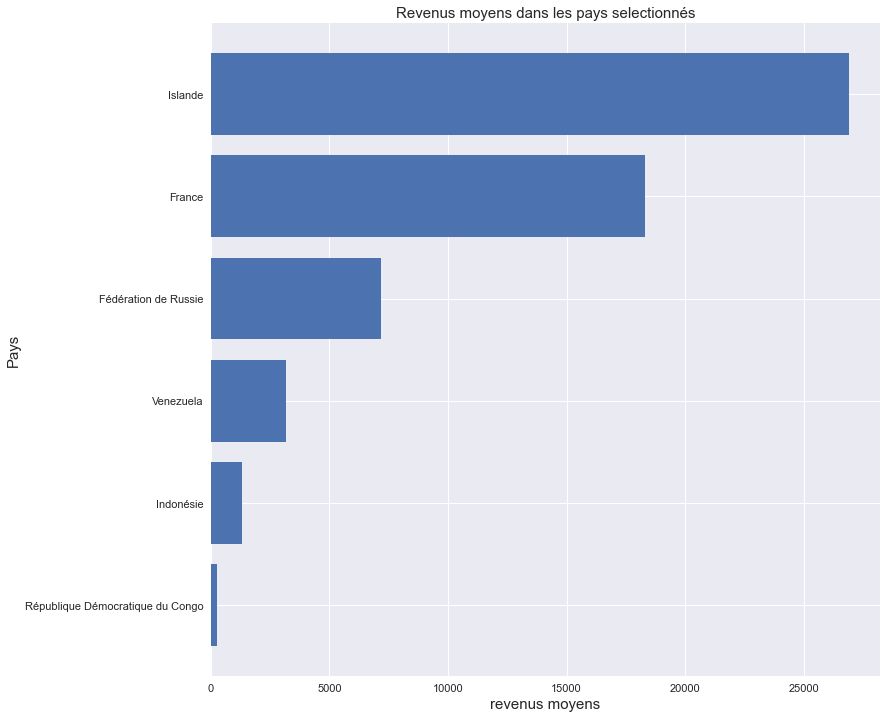

In [156]:
# Style graphiques
plt.style.use('seaborn')
# Paramètres figures
plt.figure(figsize=(12,12))

# Données des pays selectionnés
revenus_moyen = pd.DataFrame ({
        'Zone':  ['République Démocratique du Congo', 'Indonésie','Venezuela','Fédération de Russie','Islande','France'],
        'income': [276.016044,1334.618297,3167.147724,7156.770709,26888.511518,18309.407545]
}).reset_index().sort_values(by=['income','Zone'])

# Données relatives aux revenus
plt.barh(y=revenus_moyen.Zone, width=revenus_moyen.income);

# Titre
plt.title('Revenus moyens dans les pays selectionnés', fontsize=15)
plt.ylabel('Pays', fontsize=15)
plt.yticks(fontsize=11)
plt.xlabel('revenus moyens', fontsize=15)
plt.xticks(fontsize=11)
plt.savefig("Graph/RevenusMoyPaysSelect")
plt.show()

<div class ="alert alert-block alert-success">

**Resultats:** 
    
- On peut observer de grande disparité de revenus moyens dans les pays selectionnés, ce qui est un gage de diversité de l'échantillon.

    
</div>

<a id='visQuantRev2'></a>
#### Visualisation des revenus par quantile des pays selectionnés

[Haut de page](#sommaire)

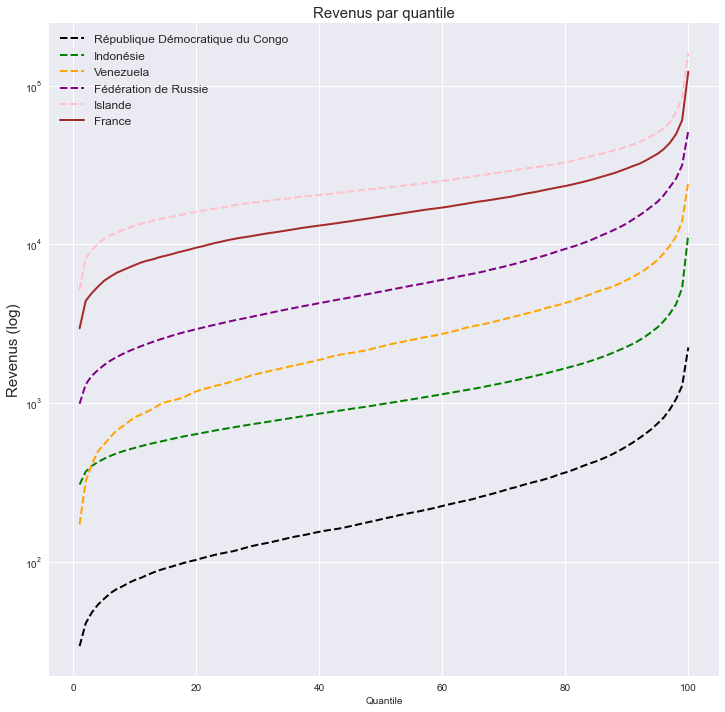

In [157]:
# Parametres figure
plt.figure(figsize=(12,12))
plt.yscale('log')

# Données des pays selectionnés
rev_moy_Rdc = df_2[df_2['Zone'] == 'République Démocratique du Congo']
rev_moy_Ind = df_2[df_2['Zone'] == 'Indonésie']
rev_moy_Ven = df_2[df_2['Zone'] == 'Venezuela']
rev_moy_Rus = df_2[df_2['Zone'] == 'Fédération de Russie']
rev_moy_Isl = df_2[df_2['Zone'] == 'Islande']
rev_moy_Fra = df_2[df_2['Zone'] == 'France']


#  Courbes

plt.plot( 'quantile', 'income', data=rev_moy_Rdc, marker='', color='black', linewidth=2, linestyle='dashed', label='République Démocratique du Congo')

plt.plot( 'quantile', 'income', data=rev_moy_Ind, marker='', color='green', linewidth=2, linestyle='dashed', label='Indonésie')

plt.plot( 'quantile', 'income', data=rev_moy_Ven, marker='', color='orange', linewidth=2, linestyle='dashed', label='Venezuela')

plt.plot( 'quantile', 'income', data=rev_moy_Rus, marker='', color='purple', linewidth=2, linestyle='dashed', label='Fédération de Russie')

plt.plot( 'quantile', 'income', data=rev_moy_Isl, marker='', color='pink', linewidth=2, linestyle='dashed', label='Islande')

plt.plot( 'quantile', 'income', data=rev_moy_Fra, marker='', color='brown', linewidth=2, linestyle='solid', label='France')


# Legend
labels= ['République Démocratique du Congo','Indonésie','Venezuela','Fédération de Russie','Islande','France']
plt.legend(labels,prop={'size':12}, loc='upper left')

# Mise en forme titres 
plt.title('Revenus par quantile', fontsize=15)
plt.ylabel('Revenus (log)', fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel('Quantile', fontsize=10)
plt.xticks(fontsize=10)
plt.savefig("Graph/RevenusQuantile")
plt.show()

<div class ="alert alert-block alert-success">

**Resultats:** 
    
- On peut observer dans ce graphique que les ecarts de revenus entre quantiles sont plus importants dans les pays à faible revenus. 

    
</div>

<a id='visLrnz2'></a>
#### Visualisation courbes de Lorenz des pays selectionés

[Haut de page](#sommaire)

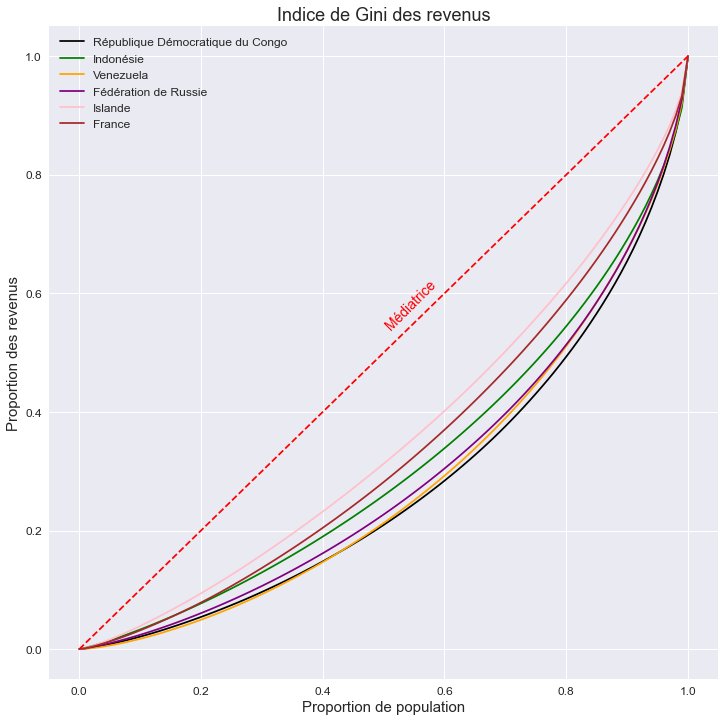

In [158]:
# parametres figure
plt.figure(figsize=(12,12))

# Calculs indice de Gini et courbes de Lorenz

# RDC
rev_moyRdc = rev_moy_Rdc['income'].values
lrnz_Rdc = np.cumsum(np.sort(rev_moyRdc)) / rev_moyRdc.sum()
lrnz_Rdc = np.append([0], lrnz_Rdc)
plt.plot(np.linspace(0,1,len(lrnz_Rdc)),lrnz_Rdc, color='black')

# Indonésie
rev_moyInd = rev_moy_Ind['income'].values
lrnz_Ind = np.cumsum(np.sort(rev_moyInd )) / rev_moyInd.sum()
lrnz_Ind = np.append([0], lrnz_Ind)
plt.plot(np.linspace(0,1,len(lrnz_Ind)),lrnz_Ind, color='green')

#Venezuela
rev_moyVen = rev_moy_Ven['income'].values
lrnz_Ven = np.cumsum(np.sort(rev_moyVen)) / rev_moyVen.sum()
lrnz_Ven = np.append([0], lrnz_Ven)
plt.plot(np.linspace(0,1,len(lrnz_Ven)),lrnz_Ven, color='orange')

# Russie
rev_moyRus = rev_moy_Rus['income'].values
lrnz_Rus = np.cumsum(np.sort(rev_moyRus)) / rev_moyRus.sum()
lrnz_Rus = np.append([0], lrnz_Rus)
plt.plot(np.linspace(0,1,len(lrnz_Rus)),lrnz_Rus, color='purple')

#Islande
rev_moyIsl = rev_moy_Isl['income'].values
lrnz_Isl = np.cumsum(np.sort(rev_moyIsl)) / rev_moyIsl.sum()
lrnz_Isl = np.append([0], lrnz_Isl)
plt.plot(np.linspace(0,1,len(lrnz_Isl)),lrnz_Isl, color='pink')

#France
rev_moyFra = rev_moy_Fra['income'].values
lrnz_Fra = np.cumsum(np.sort(rev_moyFra)) / rev_moyFra.sum()
lrnz_Fra = np.append([0], lrnz_Fra)
plt.plot(np.linspace(0,1,len(lrnz_Fra)),lrnz_Fra, color='brown')

# Médiatrice
x = [0, 1]
y = [0, 1]
plt.plot(x, y, 'red', linestyle='--', label='Médiatrice')
plt.text(0.5, 0.54, 'Médiatrice', fontsize=14, rotation = 45, color ='red')

# Titres
plt.title('Indice de Gini des revenus', fontsize=18)
plt.ylabel('Proportion des revenus', fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('Proportion de population', fontsize=15)
plt.xticks(fontsize=12)
plt.legend(labels, prop={'size':12},loc='upper left')
plt.savefig("Graph/GiniRevenus")
plt.show()

<div class ="alert alert-block alert-success">

**Resultats:** 
    
- On peut observer dans ces courbes de Lorenz un classement des inégalités de revenus et de la concentration des revenus en cohérences avec les ecarts constatés dans le graphique précèdent sur les revenus par quantile, mais aussi avec la distribution des revenus moyens par pays.
    
- Elle nous Permet de dire par exemple que « 60% » de la population islandaise détient « 40 % » des revenus et qu'il est le pays le moins inégalitaire.

    
</div>

<a id='prepEvoGini'></a>
#### Préparation des données pour l'évolution des indices de Gini au fil des ans 

[Haut de page](#sommaire)

In [159]:
# Importation de la table
evo_Gini = pd.read_csv('evo_Gini.csv', sep =',',skiprows=4)
evo_Gini.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AFE,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AFW,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Indice GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN


In [160]:
# Vérification de la cohérence des noms de pays
evo_Gini['Country Name'].unique()

array(['Aruba', nan, 'Afghanistan', 'Angola', 'Albanie', 'Andorre',
       'Le monde arabe', 'Émirats arabes unis', 'Argentine', 'Arménie',
       'Samoa américaines', 'Antigua-et-Barbuda', 'Australie', 'Autriche',
       'Azerbaïdjan', 'Burundi', 'Belgique', 'Bénin', 'Burkina Faso',
       'Bangladesh', 'Bulgarie', 'Bahreïn', 'Bahamas',
       'Bosnie-Herzégovine', 'Bélarus', 'Belize', 'Bermudes', 'Bolivie',
       'Brésil', 'Barbade', 'Brunéi Darussalam', 'Bhoutan', 'Botswana',
       'République centrafricaine', 'Canada',
       'Europe centrale et les pays baltes', 'Suisse',
       'Îles Anglo-Normandes', 'Chili', 'Chine', "Côte d'Ivoire",
       'Cameroun', 'Congo, République démocratique du',
       'Congo, République du', 'Colombie', 'Comores', 'Cabo Verde',
       'Costa Rica', 'Petits états des Caraïbes', 'Cuba', 'Curacao',
       'Îles Caïmans', 'Chypre', 'République tchèque', 'Allemagne',
       'Djibouti', 'Dominique', 'Danemark', 'République dominicaine',
       'Algérie',

In [161]:
# Supression colonne
evo_Gini.drop(columns=['Country Code','Indicator Name','Indicator Code','Unnamed: 65'], inplace = True)
# Renommer country name par Zone
evo_Gini.rename(columns={'Country Name': 'Zone'}, inplace =True)
# Réindexation sur Zone
evo_Gini.set_index('Zone', inplace=True)
# Normalisation des valeurs
evo_Gini = evo_Gini.transform(lambda x: x / 100)

<a id='selectPayEvoGini'></a>
#### Selection des pays pour l'évolution de l'indice de Gini au fil des ans 

[Haut de page](#sommaire)

In [162]:
# Données disponibles pour la République démocratique du Congo
gini_Rdc = evo_Gini.loc[evo_Gini.index == 'Congo, République démocratique du'].iloc[0:].dropna(axis=1)
gini_Rdc

,2004,2012
Zone,,
"Congo, République démocratique du",0.422,0.421


In [163]:
# Données disponibles pour l'"Indonésie"
gini_Ind = evo_Gini.loc[evo_Gini.index == 'Indonésie'].iloc[0:].dropna(axis=1)
gini_Ind

,1984,1987,1990,1993,1996,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Zone,,,,,,,,,,,,,,,,,,,,,
Indonésie,0.324,0.306,0.312,0.32,0.345,0.311,0.311,0.286,0.29,0.317,...,0.364,0.397,0.397,0.4,0.394,0.397,0.386,0.381,0.378,0.382


In [164]:
# Données disponibles pour le "Venezuela"
gini_Ven = evo_Gini.loc[evo_Gini.index == 'Venezuela'].iloc[0:].dropna(axis=1)
gini_Ven

,1981,1987,1989,1992,1995,1998,1999,2001,2002,2003,2004,2005,2006
Zone,,,,,,,,,,,,,
Venezuela,0.556,0.534,0.438,0.421,0.472,0.481,0.478,0.472,0.49,0.481,0.475,0.495,0.448


In [165]:
# Données disponibles pour la "Fédération de Russie"
gini_Rus = evo_Gini.loc[evo_Gini.index == 'Fédération de Russie'].iloc[0:].dropna(axis=1)
gini_Rus

,1993,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Zone,,,,,,,,,,,,,,,,,,,,,
Fédération de Russie,0.484,0.461,0.384,0.381,0.374,0.371,0.369,0.373,0.4,0.403,...,0.398,0.395,0.397,0.407,0.409,0.399,0.377,0.368,0.372,0.375


In [166]:
# Données disponibles pour la "Islande"
gini_Isl = evo_Gini.loc[evo_Gini.index == 'Islande'].iloc[0:].dropna(axis=1)
gini_Isl

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Zone,,,,,,,,,,,,,,,
Islande,0.268,0.28,0.29,0.302,0.295,0.318,0.287,0.262,0.268,0.268,0.254,0.278,0.268,0.272,0.261


In [167]:
# Données disponibles pour la France
gini_fra = evo_Gini.loc[evo_Gini.index == 'France'].iloc[0:].dropna(axis=1)
gini_fra

,1978,1984,1989,1994,2000,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Zone,,,,,,,,,,,,,,,,,,,,,
France,0.352,0.369,0.322,0.323,0.311,0.314,0.306,0.298,0.297,0.324,...,0.327,0.337,0.333,0.331,0.325,0.323,0.327,0.319,0.316,0.324


In [168]:
# Préparation des données
gini_Zone = evo_Gini.loc[(evo_Gini.index == 'Congo, République démocratique du')|(evo_Gini.index == 'Indonésie')|
                     (evo_Gini.index =='Venezuela')|(evo_Gini.index =='Fédération de Russie')|
                     (evo_Gini.index =='Islande')|(evo_Gini.index =='France')].T # transposition colonnes années en index

# Nouvel index
gini_Zone.index.name = 'Année'
# Renommer RDC
gini_Zone.rename(columns={'Congo, République démocratique du': 'République démocratique du Congo'}, inplace =True)
gini_Zone

Zone,République démocratique du Congo,France,Indonésie,Islande,Fédération de Russie,Venezuela
Année,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2016,NaN,0.319,0.386,0.272,0.368,NaN
2017,NaN,0.316,0.381,0.261,0.372,NaN
2018,NaN,0.324,0.378,NaN,0.375,NaN


<a id='visPayEvoGini'></a>
#### Visualisation de l'évolution des indices de Gini au fil des ans

[Haut de page](#sommaire)

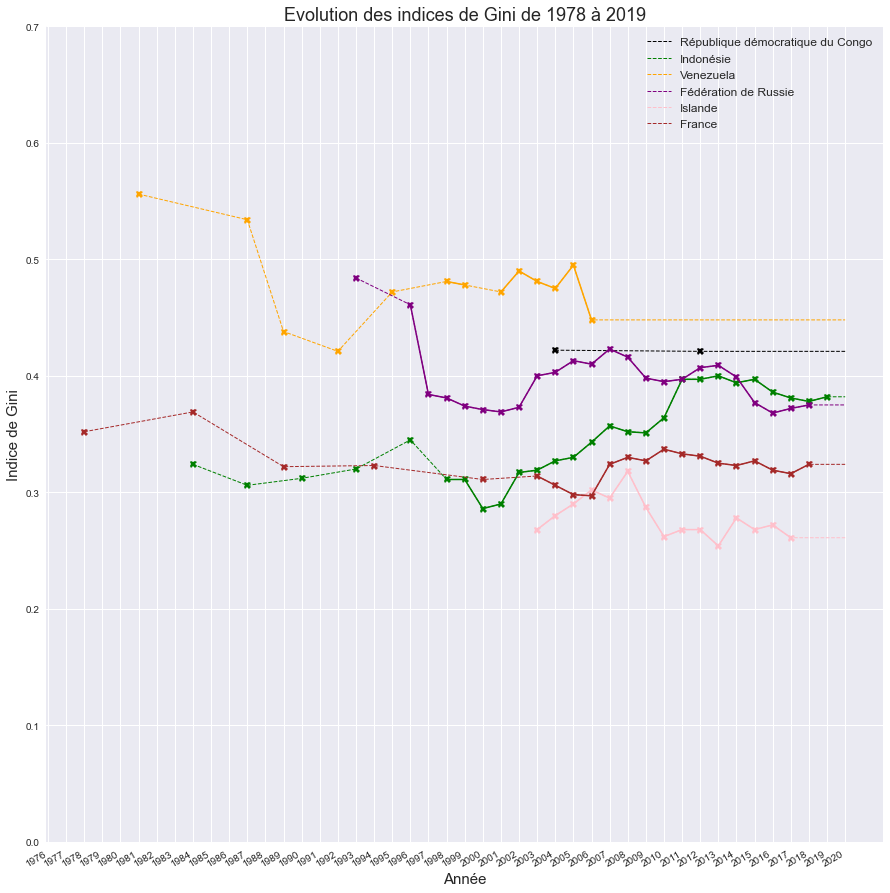

In [169]:
# Paramètre généraux
fig, ax = plt.subplots(figsize=(15,15))

# Paramètres des courbes

line, = ax.plot(gini_Zone['République démocratique du Congo'].interpolate(method='linear'),
                ls = '--', lw = 1, color='Black', label='République démocratique du Congo')
ax.plot(gini_Zone['République démocratique du Congo'], color=line.get_color(), lw=1.5, marker = 'X')


line, = ax.plot(gini_Zone['Indonésie'].interpolate(method='linear'),
                ls = '--', lw = 1, color='green', label="Indonésie")
ax.plot(gini_Zone['Indonésie'], color=line.get_color(), lw=1.5, marker = 'X')


line, = ax.plot(gini_Zone['Venezuela'].interpolate(method='linear'),
                ls = '--', lw = 1, color='orange', label="Venezuela")
ax.plot(gini_Zone['Venezuela'], color=line.get_color(), lw=1.5, marker = 'X')


line, = ax.plot(gini_Zone['Fédération de Russie'].interpolate(method='linear'),
                ls = '--', lw = 1, color='purple', label='Fédération de Russie')
ax.plot(gini_Zone['Fédération de Russie'], color=line.get_color(), lw=1.5, marker = 'X')


line, = ax.plot(gini_Zone['Islande'].interpolate(method='linear'),
                ls = '--', lw = 1, color='pink', label='Islande')
ax.plot(gini_Zone['Islande'], color=line.get_color(), lw=1.5, marker = 'X')


line, = ax.plot(gini_Zone['France'].interpolate(method='linear'),
                ls = '--', lw = 1, color='brown', label='France')
ax.plot(gini_Zone['France'], color=line.get_color(), lw=1.5, marker = 'X')


# Titres
plt.title('Evolution des indices de Gini de 1978 à 2019', fontsize=18)
plt.xlabel('Année', fontsize=15)
plt.xticks(rotation=30, horizontalalignment='right')
plt.ylabel('Indice de Gini', fontsize = 15)
plt.ylim(0,0.7)
plt.legend(fontsize=12)

# Sauvegarde
plt.savefig('Graph/evo_gini.png')
plt.show()

<div class ="alert alert-block alert-success">

**Resultats:** 
    
- On peut observer sur ce graphique relative à l'evolution de l'indice de Gini des fluctuations plus ou moins importantes en fonction des pays. On a aussi des données disponibles pour la RDC qui ne nous permettent pas d'estimer l'évolution de son indice de Gini ainsi que des données pour le Venezuela qui ne sont pas actualisées. Aussi, on va procèder au calcul de ces indices en utilisant la table de la World Income Distribution.

    
</div>

<a id='calcIndGiniW'></a>
#### Calcul de l'indice de Gini à partir de la table Worlde income distribution

[Haut de page](#sommaire)

In [170]:
# Fonction de calcul indice de Gini
def gin(Zone):
    Zone = df_2['income'].loc[df_2['Zone'] == Zone].values 
    lorenz = np.cumsum(np.sort(Zone) / Zone.sum()) 
    lorenz = np.append([0], lorenz) 
    xaxis = np.linspace(0,1,len(lorenz))
    area_one = np.trapz(y=lorenz, dx=1/len(lorenz))
    area_two = np.trapz(y=xaxis, dx=1/len(lorenz))
    ind_gini = (area_two - area_one) / area_two
    return(ind_gini)

In [171]:
# Création d'une colonne dédiée au coefficient de Gini
df_2['Gini'] = [gin(i) for i in df_2['Zone']]
df_2

,Zone,alpha3,quantile,nb_quantiles,income,gdpppp,Population,Gini
0,Albanie,ALB,1,100,728.89795,7297.0,2947314.0,0.304624
1,Albanie,ALB,2,100,916.66235,7297.0,2947314.0,0.304624
2,Albanie,ALB,3,100,1010.91600,7297.0,2947314.0,0.304624
3,Albanie,ALB,4,100,1086.90780,7297.0,2947314.0,0.304624
4,Albanie,ALB,5,100,1132.69970,7297.0,2947314.0,0.304624
...,...,...,...,...,...,...,...,...
11595,Afrique du Sud,ZAF,97,100,28858.03100,9602.0,49779472.0,0.669779
11596,Afrique du Sud,ZAF,98,100,35750.29000,9602.0,49779472.0,0.669779
11597,Afrique du Sud,ZAF,99,100,46297.31600,9602.0,49779472.0,0.669779
11598,Afrique du Sud,ZAF,100,100,82408.55000,9602.0,49779472.0,0.669779


In [172]:
# Sélection des pays suivis
Zon_gini = df_2.loc[(df_2['Zone'] == 'République Démocratique du Congo') |  
             (df_2['Zone'] == 'Indonésie') |
             (df_2['Zone'] == 'Venezuela') |
             (df_2['Zone'] == 'Fédération de Russie') |
             (df_2['Zone'] == 'Islande') |
             (df_2['Zone'] == 'France')].groupby('Zone').mean()
Zon_gini

,quantile,nb_quantiles,income,gdpppp,Population,Gini
Zone,,,,,,
France,50.5,100.0,18309.407545,30357.00000,64374979.0,0.329096
Fédération de Russie,50.5,100.0,7156.770709,14766.00000,142742366.0,0.416691
Indonésie,50.5,100.0,1334.618297,3689.00000,235469755.0,0.372115
Islande,50.5,100.0,26888.511518,36527.00000,317414.0,0.285067
République Démocratique du Congo,50.5,100.0,276.016044,303.19305,60411195.0,0.443997
Venezuela,50.5,100.0,3167.147724,11756.00000,27635827.0,0.434021


<a id='classPayIndGini'></a>
#### Classement des pays par indice de Gini

[Haut de page](#sommaire)

In [173]:
# Classement par indice de Gini
gini_moy = df_2.groupby(by='Zone').mean()
Clss_gini = gini_moy.sort_values(by='Gini', ascending=False)
Clss_gini

,quantile,nb_quantiles,income,gdpppp,Population,Gini
Zone,,,,,,
Afrique du Sud,50.5,100.0,5617.904880,9602.0,49779472.0,0.669779
Honduras,50.5,100.0,3296.268419,3628.0,7980955.0,0.601667
Colombie,50.5,100.0,3547.005276,8185.0,44254972.0,0.569271
Guatemala,50.5,100.0,2142.474753,4367.0,13739299.0,0.568293
République Centrafricaine,50.5,100.0,811.299901,685.0,4273368.0,0.561732
...,...,...,...,...,...,...
Ukraine,50.5,100.0,3349.388306,6721.0,46258189.0,0.255140
Suède,50.5,100.0,16184.222707,34371.0,9219637.0,0.254887
République Tchèque,50.5,100.0,8235.293411,23223.0,10384603.0,0.252864


<a id='MoyIndGini'></a>
#### Moyenne de l'indice de Gini

[Haut de page](#sommaire)

In [174]:
# Moyenne de l'indice de Gini
Clss_gini['Gini'].mean()

0.37896710291487956

<div class ="alert alert-block alert-success">

**Resultats:** 
    
- La moyenne de l'indice de Gini est de **0.378**

    
</div>

<a id='5maxMoyIndGini'></a>
#### Les 5 pays ayant l'indice de Gini le plus élevé 

In [175]:
# Moyenne de l'indice de Gini des 5 pays où il est le plus élevé
gini_max = Clss_gini.head()
gini_max

,quantile,nb_quantiles,income,gdpppp,Population,Gini
Zone,,,,,,
Afrique du Sud,50.5,100.0,5617.904880,9602.0,49779472.0,0.669779
Honduras,50.5,100.0,3296.268419,3628.0,7980955.0,0.601667
Colombie,50.5,100.0,3547.005276,8185.0,44254972.0,0.569271
Guatemala,50.5,100.0,2142.474753,4367.0,13739299.0,0.568293
République Centrafricaine,50.5,100.0,811.299901,685.0,4273368.0,0.561732


<a id='5minMoyIndGini'></a>
#### Les 5 pays ayant l'indice de Gini le plus faibles

[Haut de page](#sommaire)

In [176]:
# Moyenne de l'indice de Gini des 5 pays où il est le plus faible
gini_min = Clss_gini.tail()
gini_min

,quantile,nb_quantiles,income,gdpppp,Population,Gini
Zone,,,,,,
Ukraine,50.5,100.0,3349.388306,6721.0,46258189.0,0.255140
Suède,50.5,100.0,16184.222707,34371.0,9219637.0,0.254887
République Tchèque,50.5,100.0,8235.293411,23223.0,10384603.0,0.252864
Slovaquie,50.5,100.0,6096.579894,20515.0,5379233.0,0.247219
Slovénie,50.5,100.0,12106.007475,27197.0,2021316.0,0.230731


<a id='frPosIndGini'></a>
#### Position de la France

[Haut de page](#sommaire)

In [177]:
# Réinitialisation index pour avoir la position de la France
Clss_gini.reset_index(inplace=True)
# Position de la France 
Clss_gini.loc[Clss_gini['Zone'] == 'France']

,Zone,quantile,nb_quantiles,income,gdpppp,Population,Gini
76,France,50.5,100.0,18309.407545,30357.0,64374979.0,0.329096


<div class ="alert alert-block alert-success">

**Resultats:** 
    
- Les 5 pays pour lesquels l'indice de Gini est le plus élevé sont : **Afrique du Sud, Honduras,Colombie,Guatemala, République Centre Afrique.**
    
    
- Les 5 pays pour lesquels l'indice de Gini est le plus faible sont: **Ukraine,Suède,République Tchèque,Slovaquie,Slovénie.**
    

- Quant à la France, son indice de Gini est en dessous de la moyenne et elle est le **39ème** pays où il y a le moins d'inégalité.

    
</div>

<a id='Miss3'></a>
## Mission 3

[Haut de page](#sommaire)

<a id='prepData3'></a>
#### Nettoyage et préparation des données

In [178]:
# Chargement du fichier de la banque mondiale (fourni par mon mentor car n'est plus disponible sur le site web)
gdim = pd.read_csv('GDIMMay2018.csv')
gdim

,countryname,wbcode,iso3,region,incgroup2,incgroup4,fragile,survey,year,status,...,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25103.0,0.086197,18054.0,0.345224,NaN,NaN,NaN,NaN,0.10
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12107.0,0.083271,8538.0,0.389952,NaN,NaN,NaN,NaN,0.10
2,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12996.0,0.089161,9516.0,0.307687,NaN,NaN,NaN,NaN,0.10
3,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25396.0,0.050447,18387.0,0.218062,NaN,NaN,NaN,NaN,0.10
4,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12246.0,0.047961,8677.0,0.230909,NaN,NaN,NaN,NaN,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,1830.0,0.023843,980.0,0.069934,NaN,NaN,NaN,NaN,0.16
6500,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,1948.0,0.010193,912.0,0.098336,NaN,NaN,NaN,NaN,0.16
6501,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,4375.0,0.016527,2269.0,0.072795,NaN,NaN,NaN,NaN,0.16
6502,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,2109.0,0.011469,1183.0,0.088865,NaN,NaN,NaN,NaN,0.16


In [179]:
#gdim.info()

In [180]:
# Projection des variables
df_gdim = gdim[['countryname', 'iso3', 'region', 'incgroup4', 'parent', 'child','IGEincome']]
df_gdim.rename(columns={'countryname': 'country','iso3' : 'alpha3'}, inplace=True)
df_gdim.drop_duplicates(inplace=True)
df_gdim.drop_duplicates(subset=['country'], keep = 'last', inplace=True)
df_gdim

,country,alpha3,region,incgroup4,parent,child,IGEincome
11,Afghanistan,AFG,South Asia,Low income,mom,son,NaN
23,Angola,AGO,Sub-Saharan Africa,Upper middle income,mom,son,NaN
71,Albania,ALB,Europe & Central Asia,Upper middle income,mom,son,0.815874
86,Argentina,ARG,Latin America & Caribbean,Upper middle income,max,son,NaN
110,Armenia,ARM,Europe & Central Asia,Lower middle income,mom,son,NaN
...,...,...,...,...,...,...,...
6389,West Bank and Gaza,PSE,Middle East & North Africa,Lower middle income,mom,son,NaN
6401,"Yemen, Rep.",YEM,Middle East & North Africa,Lower middle income,mom,son,NaN
6437,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,mom,son,0.677000
6485,"Congo, Dem. Rep.",COD,Sub-Saharan Africa,Low income,max,son,0.707703


In [181]:
# Nombre de valeurs nulles par variable
df_gdim.isnull().sum()

country       0
alpha3        0
region        0
incgroup4     0
parent        0
child         0
IGEincome    77
dtype: int64

In [182]:
# visualisation des données manquantes
df_gdim[df_gdim.isnull().any(axis=1)]

,country,alpha3,region,incgroup4,parent,child,IGEincome
11,Afghanistan,AFG,South Asia,Low income,mom,son,NaN
23,Angola,AGO,Sub-Saharan Africa,Upper middle income,mom,son,NaN
86,Argentina,ARG,Latin America & Caribbean,Upper middle income,max,son,NaN
110,Armenia,ARM,Europe & Central Asia,Lower middle income,mom,son,NaN
290,Azerbaijan,AZE,Europe & Central Asia,Upper middle income,mom,son,NaN
...,...,...,...,...,...,...,...
6300,"Venezuela, RB",VEN,Latin America & Caribbean,Upper middle income,max,son,NaN
6377,Vanuatu,VUT,East Asia & Pacific,Lower middle income,mom,son,NaN
6389,West Bank and Gaza,PSE,Middle East & North Africa,Lower middle income,mom,son,NaN
6401,"Yemen, Rep.",YEM,Middle East & North Africa,Lower middle income,mom,son,NaN


In [183]:
# Liste régions sans 'IGEincome'
df_gdim[df_gdim['IGEincome'].isna()]['region'].unique()

array(['South Asia', 'Sub-Saharan Africa', 'Latin America & Caribbean',
       'Europe & Central Asia', 'Middle East & North Africa',
       'High income', 'East Asia & Pacific'], dtype=object)

In [184]:
#Visualisation des pays 'High income'
df_gdim[df_gdim['region'] == 'High income']['country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Switzerland',
       'Chile', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Spain',
       'Estonia', 'Finland', 'France', 'United Kingdom', 'Greece',
       'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Japan', 'Korea, Rep.', 'Lithuania', 'Luxembourg', 'Latvia',
       'Netherlands', 'Norway', 'New Zealand', 'Poland', 'Portugal',
       'Singapore', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Taiwan, China', 'Uruguay', 'United States'], dtype=object)

<div class ="alert alert-block alert-warning">

**Remarques:** 
    
- On a 77 Nan dans la variable `IGEincome`.

    
</div>

<div class ="alert alert-block alert-info">

**Infos:** 
    
- Afin de traiter le problème des 77 Nan dans la variable `IGEincome`, on va utiliser le fichier `elasticity.txt` afin de trouver les valeurs manquantes correspondantes en fonction des régions.
    
</div>

In [185]:
# Lecture du fichier issus de elasticity.txt
coef_reg = pd.read_csv('IGEincome_Region.csv', sep=',')
coef_reg

,region,Base case,Optimistic (high mobility),Pessimistic (low mobility)
0,Nordic European countries and Canada,0.20,0.15,0.3
1,Europe (except nordic countries),0.40,0.30,0.5
2,Australia/New Zealand/USA,0.40,0.30,0.5
3,Asia,0.50,0.40,0.6
4,Latin America/Africa,0.66,0.50,0.9


In [186]:
# Création dataframe sur la base de elsticity.txt et avec un matching manuel par regions 
elast = pd.DataFrame(columns=['region','coef_base_case','coef_high_mob','coef_low_mob'])
elast['region'] = df_gdim['region'].unique()
elast['coef_base_case'] = [0.50,0.66,0.40,0.66,0.20,0.50,0.66]
elast['coef_high_mob'] = [0.40,0.50,0.30,0.50,0.15,0.40,0.50]
elast['coef_low_mob'] = [0.60,0.90,0.50,0.90,0.30,0.60,0.90]
elast

,region,coef_base_case,coef_high_mob,coef_low_mob
0,South Asia,0.50,0.40,0.6
1,Sub-Saharan Africa,0.66,0.50,0.9
2,Europe & Central Asia,0.40,0.30,0.5
3,Latin America & Caribbean,0.66,0.50,0.9
4,High income,0.20,0.15,0.3
5,East Asia & Pacific,0.50,0.40,0.6
6,Middle East & North Africa,0.66,0.50,0.9


In [187]:
# Jointure des dataframes elast et df_gdim
df_elast = pd.merge(df_gdim, elast, on='region', how='left')
df_elast.head()

,country,alpha3,region,incgroup4,parent,child,IGEincome,coef_base_case,coef_high_mob,coef_low_mob
0,Afghanistan,AFG,South Asia,Low income,mom,son,NaN,0.50,0.4,0.6
1,Angola,AGO,Sub-Saharan Africa,Upper middle income,mom,son,NaN,0.66,0.5,0.9
2,Albania,ALB,Europe & Central Asia,Upper middle income,mom,son,0.815874,0.40,0.3,0.5
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,max,son,NaN,0.66,0.5,0.9
4,Armenia,ARM,Europe & Central Asia,Lower middle income,mom,son,NaN,0.40,0.3,0.5


In [188]:
# Nombre de Nan par variable
df_elast.isnull().sum()

country            0
alpha3             0
region             0
incgroup4          0
parent             0
child              0
IGEincome         77
coef_base_case     0
coef_high_mob      0
coef_low_mob       0
dtype: int64

In [189]:
# Imputation des coef_base_case pour les IGEincom manquants
df_elast['IGEincome'] = np.where(df_elast['IGEincome'].isnull()==True, df_elast['coef_base_case'], df_elast['IGEincome'])
df_elast['IGEincome'] = round(df_elast['IGEincome'],2)
df_elast.head()

,country,alpha3,region,incgroup4,parent,child,IGEincome,coef_base_case,coef_high_mob,coef_low_mob
0,Afghanistan,AFG,South Asia,Low income,mom,son,0.50,0.50,0.4,0.6
1,Angola,AGO,Sub-Saharan Africa,Upper middle income,mom,son,0.66,0.66,0.5,0.9
2,Albania,ALB,Europe & Central Asia,Upper middle income,mom,son,0.82,0.40,0.3,0.5
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,max,son,0.66,0.66,0.5,0.9
4,Armenia,ARM,Europe & Central Asia,Lower middle income,mom,son,0.40,0.40,0.3,0.5


In [190]:
# Projection des variables utiles pour la suite du projet
df_elast=df_elast[['country','alpha3','region','IGEincome']]

In [191]:
# Nombre de Nan par variable
df_elast.isnull().sum()

country      0
alpha3       0
region       0
IGEincome    0
dtype: int64

In [192]:
# Jointure df_2 et df_elast
df_5 = pd.merge(df_2, df_elast[['alpha3', 'IGEincome']], how='left', on='alpha3')
df_5.rename(columns={'IGEincome': 'P_j','Zone':'pays'}, inplace=True)# rename de IGEincome par P_j
df_5

,pays,alpha3,quantile,nb_quantiles,income,gdpppp,Population,Gini,P_j
0,Albanie,ALB,1,100,728.89795,7297.0,2947314.0,0.304624,0.82
1,Albanie,ALB,2,100,916.66235,7297.0,2947314.0,0.304624,0.82
2,Albanie,ALB,3,100,1010.91600,7297.0,2947314.0,0.304624,0.82
3,Albanie,ALB,4,100,1086.90780,7297.0,2947314.0,0.304624,0.82
4,Albanie,ALB,5,100,1132.69970,7297.0,2947314.0,0.304624,0.82
...,...,...,...,...,...,...,...,...,...
11595,Afrique du Sud,ZAF,97,100,28858.03100,9602.0,49779472.0,0.669779,0.68
11596,Afrique du Sud,ZAF,98,100,35750.29000,9602.0,49779472.0,0.669779,0.68
11597,Afrique du Sud,ZAF,99,100,46297.31600,9602.0,49779472.0,0.669779,0.68
11598,Afrique du Sud,ZAF,100,100,82408.55000,9602.0,49779472.0,0.669779,0.68


In [193]:
# Verification du nombre de modalités par variable
for key,value in df_5.iteritems():
    print('{}: {}'.format(key,len(df_5[key].unique())))

pays: 116
alpha3: 116
quantile: 100
nb_quantiles: 1
income: 11599
gdpppp: 116
Population: 116
Gini: 116
P_j: 52


In [194]:
# Nombre de Nan par variable
df_5.isnull().sum()

pays              0
alpha3            0
quantile          0
nb_quantiles      0
income            0
gdpppp            0
Population        0
Gini              0
P_j             200
dtype: int64

In [195]:
# visualisation des données manquantes
df_5[df_5.isnull().any(axis=1)]

,pays,alpha3,quantile,nb_quantiles,income,gdpppp,Population,Gini,P_j
9999,République Arabe Syrienne,SYR,1,100,143.18066,4512.000,20664037.0,0.357612,NaN
10000,République Arabe Syrienne,SYR,2,100,179.06183,4512.000,20664037.0,0.357612,NaN
10001,République Arabe Syrienne,SYR,3,100,195.83022,4512.000,20664037.0,0.357612,NaN
10002,République Arabe Syrienne,SYR,4,100,210.05444,4512.000,20664037.0,0.357612,NaN
10003,République Arabe Syrienne,SYR,5,100,222.11244,4512.000,20664037.0,0.357612,NaN
...,...,...,...,...,...,...,...,...,...
11394,Kosovo,XKX,96,100,5155.36470,7032.452,1747383.0,0.314475,NaN
11395,Kosovo,XKX,97,100,5689.52930,7032.452,1747383.0,0.314475,NaN
11396,Kosovo,XKX,98,100,6233.73930,7032.452,1747383.0,0.314475,NaN
11397,Kosovo,XKX,99,100,7366.67700,7032.452,1747383.0,0.314475,NaN


<div class ="alert alert-block alert-warning">

**Remarque:** 
    
- Il semble qu'il y ai encore des valeurs manquantes dans `P_j` pour deux pays : la République Arabe Syrienne et le Kosovo
    
</div>




In [196]:
# visualisation des coef d'élasticité issues de elasticity txt
elast

,region,coef_base_case,coef_high_mob,coef_low_mob
0,South Asia,0.50,0.40,0.6
1,Sub-Saharan Africa,0.66,0.50,0.9
2,Europe & Central Asia,0.40,0.30,0.5
3,Latin America & Caribbean,0.66,0.50,0.9
4,High income,0.20,0.15,0.3
5,East Asia & Pacific,0.50,0.40,0.6
6,Middle East & North Africa,0.66,0.50,0.9


In [197]:
# Imputation des valeurs a partir du df 'elast' issue des données de elasticity.txt 
df_5.loc[df_5['alpha3'] == 'SYR', 'P_j'] = 0.66 # affectation coef_base_case 
df_5.loc[df_5['alpha3'] == 'XKX', 'P_j'] = 0.40 # affectation coef_base_case 
# verification Nombre de Nan par variable
df_5.isnull().sum()

pays            0
alpha3          0
quantile        0
nb_quantiles    0
income          0
gdpppp          0
Population      0
Gini            0
P_j             0
dtype: int64

On a remplie les valeurs manquantes `P_j` pour les deux pays à savoir le Kosovo et la République Arabe de Syrie.

In [198]:
# dataframe complet
df_5

,pays,alpha3,quantile,nb_quantiles,income,gdpppp,Population,Gini,P_j
0,Albanie,ALB,1,100,728.89795,7297.0,2947314.0,0.304624,0.82
1,Albanie,ALB,2,100,916.66235,7297.0,2947314.0,0.304624,0.82
2,Albanie,ALB,3,100,1010.91600,7297.0,2947314.0,0.304624,0.82
3,Albanie,ALB,4,100,1086.90780,7297.0,2947314.0,0.304624,0.82
4,Albanie,ALB,5,100,1132.69970,7297.0,2947314.0,0.304624,0.82
...,...,...,...,...,...,...,...,...,...
11595,Afrique du Sud,ZAF,97,100,28858.03100,9602.0,49779472.0,0.669779,0.68
11596,Afrique du Sud,ZAF,98,100,35750.29000,9602.0,49779472.0,0.669779,0.68
11597,Afrique du Sud,ZAF,99,100,46297.31600,9602.0,49779472.0,0.669779,0.68
11598,Afrique du Sud,ZAF,100,100,82408.55000,9602.0,49779472.0,0.669779,0.68


<div class ="alert alert-block alert-success">

**Resultat:** 
    
- Il n' y a plus de valeurs manquantes dans `IGEincome` que l'on a renommé `P_j`.
    
</div>

In [199]:
import scipy.stats as st
import pandas as pd
import numpy as np
from collections import Counter

<a id='Q1à3'></a>
#### Question 1 à 3 : 

1-Générez un grand nombre $(n)$ de réalisations d'une variable que nous appellerons  $(ln(Y_{parent}))$ selon une loi normale. Le choix de la moyenne et de l'écart type n'auront pas d'incidence sur le résultat final. \(n\) doit être supérieur à 1000 fois le nombre de quantiles.

2-Générez $(n)$ réalisations du terme d'erreur $(\epsilon)$ selon une loi normale de moyenne 0 et d'écart type 1.

3- Pour une valeur donnée de $(\rho_j)$ (par exemple 0.9), calculez $(y_{child} = e^{\alpha+\rho_jln(y_{parent})+\epsilon})$ . Le choix de $( \alpha)$ n'a aucune incidence sur le résultat final et peut être supprimé. À ce stade, $(y_{child})$ contient des valeurs dont l'ordre de grandeur ne reflète pas la réalité, mais cela n'a pas d'influence pour la suite.


[Haut de page](#sommaire)

In [202]:
# Initialisation des valeurs choisis
pj = 0.5                #Coefficient d'élasticité d'un pays (France) 
nb_quantiles = 10       #Nombre de quantiles
n = 1000*nb_quantiles    #Taille de l'échantillon

def generate_incomes(n, pj):

    ln_y_parent = st.norm(0,1).rvs(size=n)# Q1: Production pseudo_aléatoire de la variable 'ln(Yparent)'selon une loi normale

    residues = st.norm(0,1).rvs(size=n)# Q2: Production pseudo_aléatoire du terme d'erreur epsilon selon une loi normale

    # Q3: Revenus des enfants et parent 
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)

y_child, y_parents = generate_incomes(n, pj)

<a id='Q4'></a>
#### Question 4 : 

4-Pour chacun des $(n)$ individus générés, calculez la classe de revenu  $(c_{i,child})$ ainsi que la classe de revenu de ses parents $(c_{i,parent})$ , à partir de $(y_{child})$ et $(y_{parent})$.

[Haut de page](#sommaire)

In [203]:
# calcul de la classe de revenu des enfants et de ses parents à partir des individus Y_child et Y_parents
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

# Dataframe présentant: revenu enfant, parents et classe de revenus enfant, parents
def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

# Visualisation dataframe sample
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
sample

,y_child,y_parents,c_i_child,c_i_parent
0,2.255214,3.578184,8,9
1,23.161666,8.470063,10,10
2,0.133354,1.191778,1,6
3,0.951509,0.343001,5,2
4,0.543979,0.840714,3,5
...,...,...,...,...
9995,0.347344,1.696193,2,8
9996,0.258820,1.032550,2,6
9997,1.809353,1.192341,8,6
9998,0.688721,3.025172,4,9


<a id='Q5'></a>
#### Question 5 :
5-À partir de cette dernière information, estimez pour chaque  $(c_{i,child})$ la distribution conditionnelle de $(c_{i,parent})$ . Par exemple, si vous observez 6 individus ayant à la fois  $(c_{i,child} = 5)$ et $(c_{i,parent} = 8)$ , et que 200 individus sur 20000 ont $( c_{i,child} = 5)$ , alors la probabilité d'avoir $( c_{i,parent} = 8)$ sachant  $(c_{i,child} = 5)$ et sachant $(\rho_j=0.9)$ sera estimée à 6/200 (On note cette probabilité comme ceci : $(P(c_{i,parent}=8|c_{i,child}=5,\rho_j=0.9) = 0.03))$. Si votre population est divisée en $(c)$ classes de revenu, vous devriez alors avoir $(c^2)$ estimations de ces probabilités conditionnelles, pour chaque pays.

[Haut de page](#sommaire)

In [204]:
# Renvoie la distribution des classes de revenu des parents pour la classe enfant

def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()# On compte le nombre totale d'individus
    
    if total == 0 :# S'il n'y a aucun individu, une ligne de 0 est renvoyée
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1): # Pour chaque quantiles parents
        subset = counts[counts.c_i_parent == q_p]# On ne garde que les lignes du quantile parent concerné
        
        if len(subset):
            nb = subset["counts"].values[0] # Si la longueur n'est pas nulle,
            distrib += [nb / total] # on ajoute au resultat la fréquence d'apparition de quantile parent
        else:
            distrib += [0]
    return distrib   


# Calcul de la distribution conditionnelle de c_i_parents pour chaque c_i_child
def conditional_distributions(sample, nb_quantiles):
    # On compte le nombre d'individus parents-enfant  qu'il y a pour chaque paire de quantiles parents-enfant
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    # on comptabilise nbre des quantiles
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 

# Probabilité d'appartenance d'un parents à une classe    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]


cd = conditional_distributions(sample, nb_quantiles)

In [205]:
#Fonction permettant de visualiser graphiquement les distributions conditionnelles 
def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure(figsize = (13, 9))
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("Distribution conditionnel " + "p=" + str(p), fontsize=15, fontweight='bold')
    plt.legend()
    plt.xlabel("quantile parents", fontsize=12, fontweight='bold')
    plt.ylabel("probabilité du quantile enfant", fontsize=12, fontweight='bold')
    
    plt.savefig("Graph/Distribution conditionnel")
    plt.show()

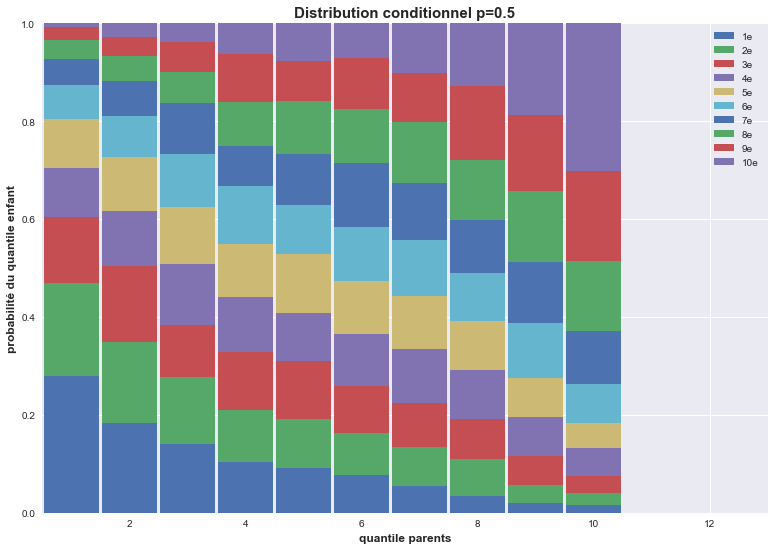

In [206]:
# visualisation des distributions conditionnelles
plot_conditional_distributions(pj, cd, nb_quantiles)

In [207]:
# visualisation numerique de la distribution conditionnelle p=0.5

c_i_child = 5
c_i_parent = 8

p = proba_cond(c_i_parent, c_i_child, cd)
print('P(c_i_parent = {} | c_i_child = {}, pj = {}) = {}'.format(c_i_parent, c_i_child, pj, p))

P(c_i_parent = 8 | c_i_child = 5, pj = 0.5) = 0.112


Avec un coeficient d'élasticité intergénérationnelle de 0.5, les enfants dont les parents appartiennent au 8e décile ont 11 % de chance d'appartenir au 5e décile.

<a id='Q6'></a>
#### Question 6:

6-Optionnellement et pour vérifier la cohérence de votre code, vous pouvez créer un graphique représentant ces distributions conditionnelles. Voici 2 exemples pour une population segmentée en 10 classes, pour 2 valeurs de $(\rho_j)$ : l'une traduisant une forte mobilité (0.1) et l'autre une très faible mobilité (0.9): (voir graph)

[Haut de page](#sommaire)

##### Forte mobilité

In [208]:
#Fonction permettant de visualiser le comportement des distributions conditionnelles 
def plot_conditional_distributions_fortMob(p, cd, nb_quantiles):
    plt.figure(figsize = (13, 9))
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("Forte mobilité " + "p=" + str(p), fontsize=15, fontweight='bold')
    plt.legend()
    plt.xlabel("quantile parents", fontsize=10, fontweight='bold')
    plt.ylabel("probabilité du quantile enfant", fontsize=10, fontweight='bold')
    
    plt.savefig("Graph/Distribution conditionnel FortMob")
    plt.show()

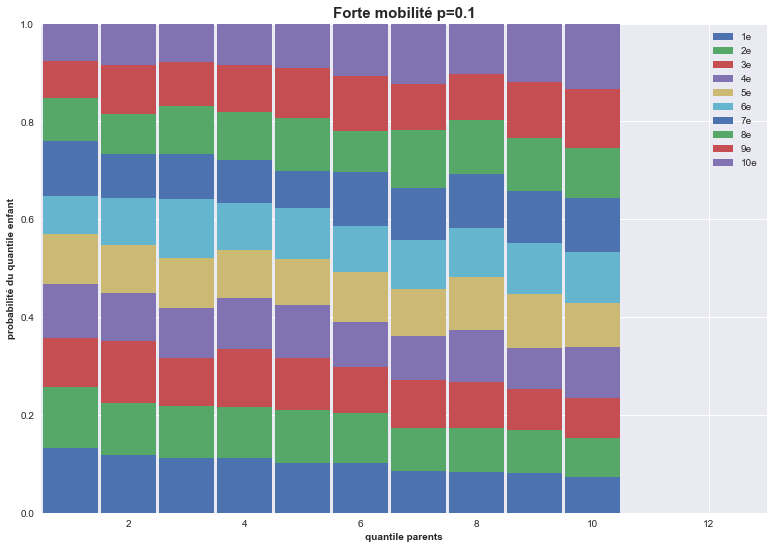

In [209]:
# Visualisation de la forte mobilité
# parametres
pj_fortMob = 0.1                
nb_quantiles_fortMob = 10   #nbre quantiles    
n_fortMob  = 1000*nb_quantiles_fortMob  #taille du sample 
# calculs
y_child_fortMob, y_parents_fortMob = generate_incomes(n_fortMob, pj_fortMob)
sample_fortMob = compute_quantiles(y_child_fortMob, y_parents_fortMob, nb_quantiles_fortMob)
cd_fortMob = conditional_distributions(sample_fortMob, nb_quantiles_fortMob)
plot_conditional_distributions_fortMob(pj_fortMob, cd_fortMob, nb_quantiles_fortMob)

In [210]:
# visualisation numérique conditionnelle d'une forte mobilité P=0.1

# Parametres
c_i_child_fortMob= 5
c_i_parent_fortMob= 8
# calcul

p_fortMob = proba_cond(c_i_parent_fortMob, c_i_child_fortMob, cd_fortMob)
print(" P(c_i_parent_fortMob = {} | c_i_child_fortMob = {}, pj_fortMob = {}) = {}".format(c_i_parent_fortMob, c_i_child_fortMob, pj_fortMob, p_fortMob))

 P(c_i_parent_fortMob = 8 | c_i_child_fortMob = 5, pj_fortMob = 0.1) = 0.103


Avec un coeficient d'élasticité intergénérationnelle de 0.1, les enfants dont les parents appartiennent au 8e décile ont 10 % de chance d'appartenir au 5e décile.

##### Faible mobilité

In [211]:
#Fonction permettant de visualiser le comportement des distributions conditionnelles 
def plot_conditional_distributions_faibMob(p, cd, nb_quantiles):
    plt.figure(figsize = (13, 9))
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("Faible mobilité " + "p=" + str(p), fontsize=15, fontweight='bold')
    plt.legend()
    plt.xlabel("quantile parents", fontsize=10, fontweight='bold')
    plt.ylabel("probabilité du quantile enfant", fontsize=10, fontweight='bold')
    
    plt.savefig("Graph/Distribution conditionnel FaibMob")
    plt.show()

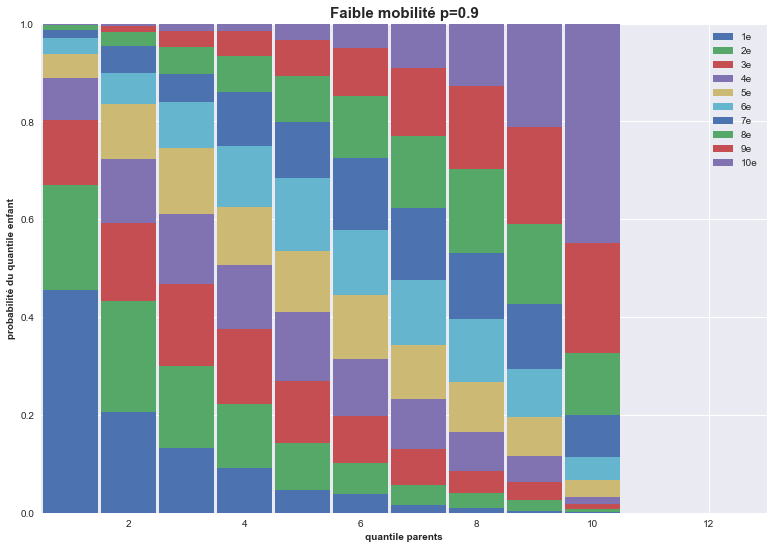

In [212]:
# Visualisation de la faible mobilité
pj_faibMob = 0.9                
nb_quantiles_faibMob = 10       
n_faibMob  = 1000*nb_quantiles_faibMob   

y_child_faibMob, y_parents_faibMob = generate_incomes(n_faibMob, pj_faibMob)
sample_faibMob = compute_quantiles(y_child_faibMob, y_parents_faibMob, nb_quantiles_faibMob)
cd_faibMob = conditional_distributions(sample_faibMob, nb_quantiles_faibMob)
plot_conditional_distributions_faibMob(pj_faibMob, cd_faibMob, nb_quantiles_faibMob)

In [213]:
# visualisation numérique conditionnelle d'une faible mobilité P=0.9
c_i_child_faibMob = 5
c_i_parent_faibMob = 8
p_faibMob = proba_cond(c_i_parent_faibMob , c_i_child_faibMob, cd_faibMob)
print(" P(c_i_parent_faibMob = {} | c_i_child_faibMob = {}, pj_faibMob = {}) = {}".format(c_i_parent_faibMob, c_i_child_faibMob , pj_faibMob, p_faibMob))

 P(c_i_parent_faibMob = 8 | c_i_child_faibMob = 5, pj_faibMob = 0.9) = 0.097


Avec un coeficient d'élasticité intergénérationnelle de 0.9, les enfants dont les parents appartiennent au 8e décile ont 9 % de chance d'appartenir au 5e décile.

<a id='Q7'></a>
#### Question 7: 

7-Éventuellement et pour éviter toute confusion, effacez les individus que vous venez de générer (nous n'en avons plus besoin), et ne gardez que les distributions conditionnelles.

[Haut de page](#sommaire)

In [109]:
# suppression des variables inutiles
sample = sample.iloc[:, 2:]
sample

,c_i_child,c_i_parent
0,2,6
1,8,8
2,4,1
3,9,10
4,5,2
...,...,...
9995,4,6
9996,7,5
9997,3,10
9998,1,4


<a id='Q8'></a>
#### Question 8: 

8-Nous allons maintenant travailler sur un nouvel échantillon. Celui-ci sera créé à partir de la WID. Pour chaque individu de la World Income Distribution, créez-en 499 "clones". La taille de votre nouvel échantillon sera donc 500 fois plus grand que celui de la World Income Distribution.

[Haut de page](#sommaire)

In [110]:
# Préparation des données pour la suite du projet
# Projection des varibles utiles
df_50 = df_5[['pays', 'alpha3', 'quantile', 'Population','income','Gini', 'P_j']]
df_50.rename(columns={'Gini': 'G_j','quantile': 'c_i_child'}, inplace=True)#'income' renommé 'm_j'
# ajout de la variable revenue moyen
df_mj=df_3[['alpha3','income']]
df_mj.rename(columns={'income': 'M_j'}, inplace=True)#'income' renommé 'm_j'
#Jointure df_mj et df_50
df_500 = pd.merge(df_mj, df_50[['pays', 'alpha3', 'c_i_child', 'Population', 'income','G_j', 'P_j']], how='left', on='alpha3')
df_500= df_500[['pays', 'alpha3', 'c_i_child', 'Population', 'income','G_j','M_j','P_j']]
df_500

,pays,alpha3,c_i_child,Population,income,G_j,M_j,P_j
0,Albanie,ALB,1,2947314.0,728.89795,0.304624,2994.829902,0.82
1,Albanie,ALB,2,2947314.0,916.66235,0.304624,2994.829902,0.82
2,Albanie,ALB,3,2947314.0,1010.91600,0.304624,2994.829902,0.82
3,Albanie,ALB,4,2947314.0,1086.90780,0.304624,2994.829902,0.82
4,Albanie,ALB,5,2947314.0,1132.69970,0.304624,2994.829902,0.82
...,...,...,...,...,...,...,...,...
11595,Afrique du Sud,ZAF,96,49779472.0,24553.56800,0.669779,5617.904880,0.68
11596,Afrique du Sud,ZAF,97,49779472.0,28858.03100,0.669779,5617.904880,0.68
11597,Afrique du Sud,ZAF,98,49779472.0,35750.29000,0.669779,5617.904880,0.68
11598,Afrique du Sud,ZAF,99,49779472.0,46297.31600,0.669779,5617.904880,0.68


In [111]:
# Copie du dataframe
df_500_2 = df_500.copy()

# Création des clones
df_500_3 = df_500_2.append([df_500_2]*499, ignore_index=True)


# copie et projection du dataframe pour le calcul de la classe parent
new_sample = df_500_3.copy()
new_sample = new_sample[['alpha3', 'c_i_child','income','G_j',
                        'M_j','P_j']]
new_sample.head()

,alpha3,c_i_child,income,G_j,M_j,P_j
0,ALB,1,728.89795,0.304624,2994.829902,0.82
1,ALB,2,916.66235,0.304624,2994.829902,0.82
2,ALB,3,1010.91600,0.304624,2994.829902,0.82
3,ALB,4,1086.90780,0.304624,2994.829902,0.82
4,ALB,5,1132.69970,0.304624,2994.829902,0.82


<a id='Q9à11'></a>
#### Question 9:

9-Pour chaque $(c_{i,child})$ et chaque pays, il y a maintenant 500 individus. Vous attribuerez aux 500 individus leurs classes $( c_{i,parent})$ conformément aux distributions trouvées précédemment. Par exemple, si $(P(c_{i,parent}=8|c_{i,child}=5,\rho_j=0.9) = 0.03)$ , alors vous assignerez la classe $(c_{i,parent} = 8)$ à 15 des 500 individus du pays $( j)$ ayant $(c_{i,child}=5)$ , car 500*0.03 = 15.

[Haut de page](#sommaire)

In [112]:
def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n)
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)
    
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

def conditional_distributions(sample):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    return counts 

nb_quantiles = 100       # nombre de quantiles (nombre de classes de revenu)
n  = 500*nb_quantiles   # taille de l'échantillon

counts = {}

for country in new_sample['alpha3'].unique(): # selection des pays
    
    pj = new_sample.loc[new_sample[new_sample['alpha3'] == country].index,'P_j'].values # counts
    
    y_child, y_parents = generate_incomes(n, pj)
    sample = compute_quantiles(y_child, y_parents, nb_quantiles)

    counts[country] = pd.DataFrame(conditional_distributions(sample))
    
;
def function(counts):
    effectif = []
    c_i_parent_q = []

    for i in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == i]
        if len(subset):
            nb = subset["counts"].values[0]
            effectif += [nb]
            c_i_parent_q += [i]*effectif[i-1]
        else:
            effectif += [0] 
            
    return c_i_parent_q   

def function2(counts):

    c_i_parent_p = []

    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile] 
        c_i_parent_p += function(subset)
        
    return c_i_parent_p


col = []

for country in counts:
    subset = counts[country]
    col += function2(subset)



In [114]:
new_df = new_sample.merge(subset)
new_df

,alpha3,c_i_child,income,G_j,M_j,P_j,c_i_parent,counts
0,ALB,1,728.89795,0.304624,2994.829902,0.82,1,75
1,ALB,1,728.89795,0.304624,2994.829902,0.82,2,44
2,ALB,1,728.89795,0.304624,2994.829902,0.82,3,34
3,ALB,1,728.89795,0.304624,2994.829902,0.82,4,26
4,ALB,1,728.89795,0.304624,2994.829902,0.82,5,19
...,...,...,...,...,...,...,...,...
532323995,ZAF,100,82408.55000,0.669779,5617.904880,0.68,96,28
532323996,ZAF,100,82408.55000,0.669779,5617.904880,0.68,97,20
532323997,ZAF,100,82408.55000,0.669779,5617.904880,0.68,98,40
532323998,ZAF,100,82408.55000,0.669779,5617.904880,0.68,99,34


In [115]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532324000 entries, 0 to 532323999
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   alpha3      object 
 1   c_i_child   int64  
 2   income      float64
 3   G_j         float64
 4   M_j         float64
 5   P_j         float64
 6   c_i_parent  int64  
 7   counts      int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 35.7+ GB


In [116]:
# Projection du nombre d'individus appartenant au 5eme centile et dont les parents appartiennent au 8eme centile 
new_df.loc[(new_df['c_i_parent'] == 8) & (new_df['c_i_child'] == 5)]

,alpha3,c_i_child,income,G_j,M_j,P_j,c_i_parent,counts
16762007,ALB,5,1132.69970,0.304624,2994.829902,0.82,8,15
16762086,ARG,5,832.31850,0.449902,5847.884654,0.66,8,15
16762165,ARM,5,690.84710,0.263108,1628.382785,0.40,8,15
16762244,AUT,5,6380.27800,0.278279,16637.600204,0.25,8,15
16762323,AZE,5,841.75244,0.312321,2357.429023,0.40,8,15
...,...,...,...,...,...,...,...,...
21343612,VEN,5,548.97880,0.434021,3167.147724,0.66,8,15
21343691,VNM,5,393.53284,0.377481,1377.773966,0.48,8,15
21343770,XKX,5,730.40220,0.314475,2176.269035,0.40,8,15
21343849,YEM,5,319.84152,0.374161,1042.635870,0.66,8,15


On obtient bien 15 individus par pays pour les enfants appartenant au 5éme centile et dont les parents appartienns au 8ème decile

#### Question 10:

10-Éventuellement et pour éviter toute confusion, effacez la variable $(c_{i,child})$  : nous n'en avons pas besoin pour la mission 4.

In [117]:
# Suppression de la variable c_i_child 
new_df.drop(columns='c_i_child', inplace=True)

#### Question 11:

11-Assurez-vous que votre nouvel échantillon contiennent bien les variables initialement présentes dans la World Income Distribution : $(m_j)$ et $(G_j)$ .

Utilisez ce nouvel échantillon pour la mission 4.

In [118]:
# export des variables pour la mission 4
new_df.to_csv('df_fini.csv',index=False)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532324000 entries, 0 to 532323999
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   alpha3      object 
 1   income      float64
 2   G_j         float64
 3   M_j         float64
 4   P_j         float64
 5   c_i_parent  int64  
 6   counts      int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 31.7+ GB


<a id='Miss4'></a>
# Mission 4

**Objectif :** Expliquer la variable revenu des individus (endogène) en fonction de plusieurs variables explicatives (exogènes): le pays de l'individu, l'indice de Gini de ce pays, la classe de revenus des parents, le revenu moyen.

In [6]:
# Projection des variables utiles
data4 = new_df.copy()
data4 =data4[['alpha3','income','G_j','M_j','P_j','c_i_parent']]
# Pays sélectionnés
data4_select = data4[(data4['alpha3'] == 'COD') | (data4['alpha3'] == 'IDN') | 
                         (data4['alpha3'] == 'FRA') | (data4['alpha3'] == 'ISL') | 
                         (data4['alpha3'] == 'RUS') | (data4['alpha3'] == 'VEN')]
data4_select.head()

,alpha3,income,G_j,M_j,P_j,c_i_parent
1220,COD,29.364283,0.443997,276.016044,0.71,1
1221,COD,29.364283,0.443997,276.016044,0.71,2
1222,COD,29.364283,0.443997,276.016044,0.71,3
1223,COD,29.364283,0.443997,276.016044,0.71,4
1224,COD,29.364283,0.443997,276.016044,0.71,5


<a id='ANOVA'></a>
### ANOVA avec comme variable explicative  le pays de l’individu 

[Haut de page](#sommaire)

<div class ="alert alert-block alert-warning">

**Remarques :**
    
    
La variance influençant fortement la stabilité des resultats, on prend le partie de bien ecarter les mesures des $x$.Aussi, on va utiliser l'echantillon des pays selectionnés précèdemment et non pas la table complète car cela est très coûteux en temps et en mémoire informatique.
    
</div>

 <div class ="alert alert-block alert-info"> 

**Infos:**
    
$ \ $ 
        
On va  mesurer la liaison entre la variable pays`alpha3` et la variable `income` en utilisant le modele <b>ANOVA</b>, on evaluera la qualité du model avec le <b>$ R^2 $</b>:
    
$ \ $ 

<b>regression lineaire simple (ANOVA) :</b>
$ Y=αi+μ+ϵ $       

$ \ $ 
    
<b>hypothèse residus distribués normalement et non corrélés:</b>

$ L(\epsilon_i)= N(0,\sigma^2)$              
    
$Cov(\epsilon_i \epsilon_j)= 0\forall i,j$
   
$ \ $ 
    
   
$ \ $ 
        
<b>Décomposition de la variabilité:</b>    
    
Variation totale ( Somme des carrés d'ecart totale):
$ \displaystyle\ SCT=\sum_{i=1}^{k}\sum_{j=1}^{n}(y_{ij}-\bar{y})^2 $   

$ \ $
    
Variation interclasse (Somme des carrés d'écart due au facteur):
$ \displaystyle\ SCE=\sum_{i=1}^{k}n_i(\bar y_i-\bar{y})^2 $

$ \ $ 
    
Variation intraclasse (Somme des carrés d'écart residuelle):
$ \displaystyle\ SCR=\sum_{i=1}^{k}n_is^2_i $

$ \ $  
    
    
<b>Le Coefficent de determination dans notre cas c'est $ R^2=\eta^2 =$ carré du rapport de corrélation, car on souhaite chiffrer l'intensité de la liaison d'une variable qualitative `pays`et une variable quantitative `income`: </b>   
       
$ \ $    
     
$ \displaystyle\ R^2=\frac {Vinterclasses}{Vtotale}$
       
$ \ $    
   
    
<b>Interprétation du test :</b>  
        
$ \ $    
    
Si $R^2=\eta^2=0 $  , alors, cela signifie que les moyennes par pays sont toutes égales,donc a priori pas de relation entre la variable pays `alpha3`et revenu des individus `income`.
        
$ \ $    
        
Si $R^2=\eta^2=1 $ ,alors,  cela signifie que les moyennes par pays sont très différentes, donc, il existe a priori une relation entre la variable pays et revenu des individus.
 
    
</div>

**Visualisation graphique de l'influence de chaques pays sur le revenus des individus avec valeurs réélles :**

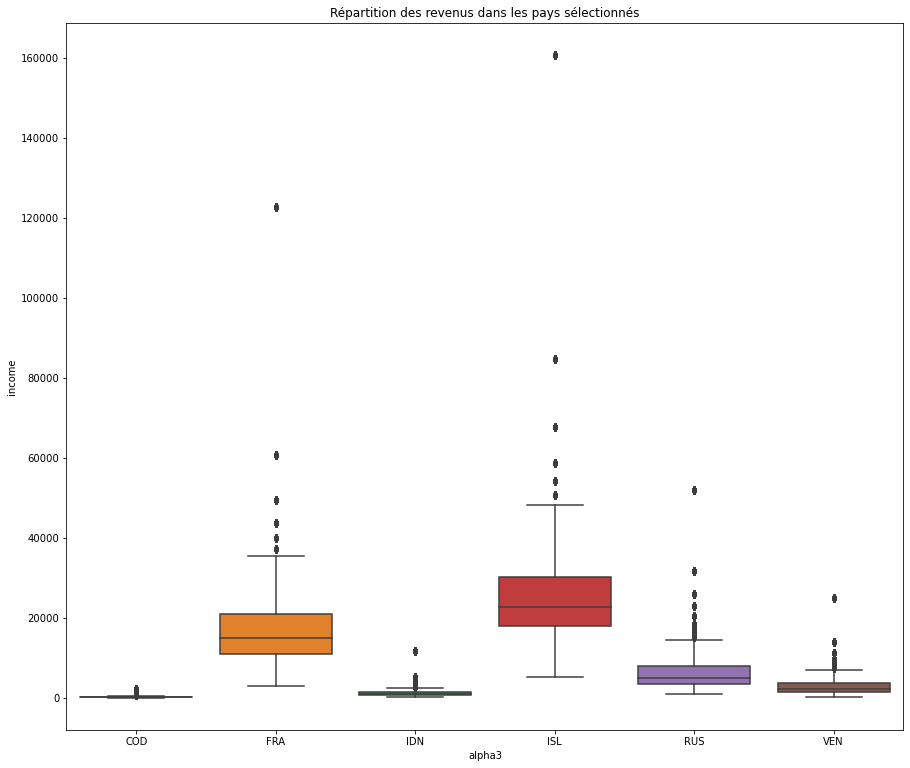

In [4]:
# Boxplot de la distribution des revenus dans chacun des pays selectionnés
plt.figure(figsize=(15,13))
sns.boxplot(x='alpha3', y="income", data = data4_select)
plt.title('Répartition des revenus dans les pays sélectionnés')
plt.savefig('Graph/Répartition des revenus dans les pays sélectionnés')
plt.show()

**Graphiquement :** Il semble que les variances ne sont pas égales. Cependant, afin de mieux visualiser cela nous passerons les valeurs en mode Log.

**Regression de l'influence de chaques pays sur le revenus des individus avec valeurs réelles :**

In [5]:
# Regression linaire simple de l'influence de chaques pays sur le revenu des individus (valeurs réelles)
ANOVA_real = smf.ols('income ~ alpha3', data=data4_select).fit()
print(ANOVA_real.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 6.335e+06
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:37:07   Log-Likelihood:            -2.8955e+08
No. Observations:            27534000   AIC:                         5.791e+08
Df Residuals:                27533994   BIC:                         5.791e+08
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       263.7114      4.168     63.269

**Numériquement:** On a obtenu une $Pvalue = 0$, il existe donc à priori une influence de la variable explicatives pays sur la variable à expliquer le revenu des individus et notre resultat est hautement significatif.
    

En effet, on a un $ R^2=\eta^2=0,53 $, cela signifie à priori que notre modèle de regression explique 53% de la variance. Cependant, on va poursuivre notre investigation en appliquant un model basé sur le log du revenu des individus à cette même ANOVA.
  

**Visualisation et regression en valeurs logarithmiques :**

In [7]:
# Conversion des incomes pays selectionnées en valeurs logarithmiques
data4_select_log = data4_select.copy()
data4_select_log["income"] = np.log(data4_select_log["income"])
# conversion des revenus moyen en log
data4_select_log["M_j"] = np.log(data4_select_log["M_j"])

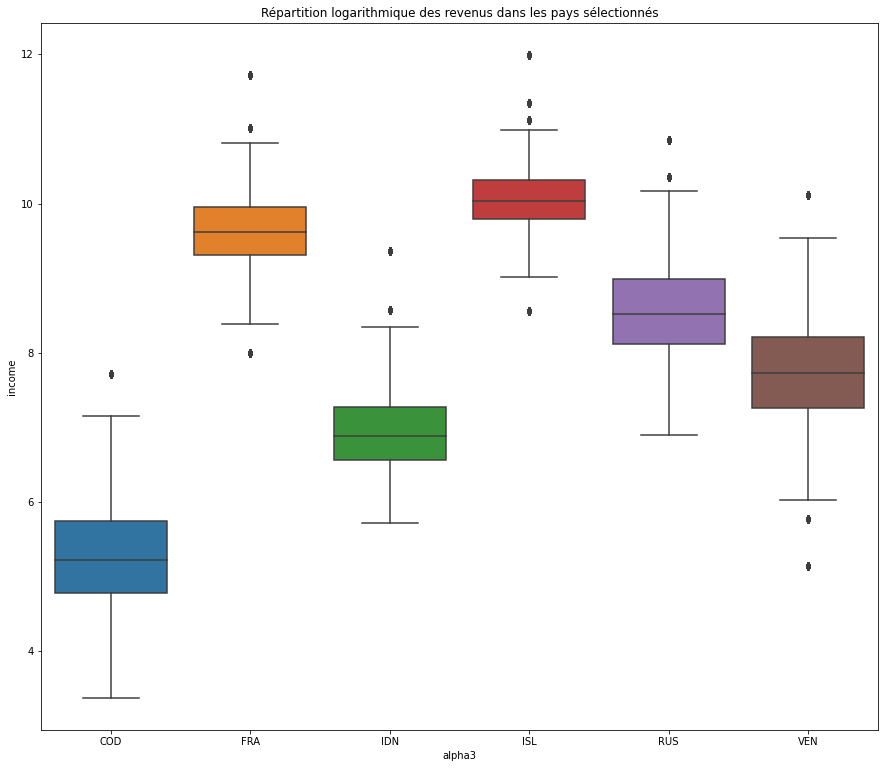

In [7]:
# Boxplot de la distribution logarithmique des revenus dans les pays selectionnés
plt.figure(figsize=(15,13))
sns.boxplot(x='alpha3', y='income', data = data4_select_log)
plt.title('Répartition logarithmique des revenus dans les pays sélectionnés')
plt.savefig('Graph/Répartition logarithmique des revenus dans les pays sélectionnés')
plt.show()

**Graphiquement :** il semble que ce model est meilleur que le précèdent. On constate qu'avec cette projection logarithmique on visualise mieux  les ecarts de variance et la moyenne des revenus par pays. Aussi, eu egard à cette dernière visualisation on peut dire que le pays d'appartenance influence bien le revenu des individus.

In [8]:
# Regression linaire simple de l'influence de chaques pays selectionné sur le revenus des individus (valeurs en Log)
ANOVA = smf.ols('income ~ alpha3', data=data4_select_log).fit()
print(ANOVA.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 3.625e+07
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:44:12   Log-Likelihood:            -2.6424e+07
No. Observations:            27534000   AIC:                         5.285e+07
Df Residuals:                27533994   BIC:                         5.285e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.2821      0.000   1.79e+04

**Numériquement:** On a obtenu une $Pvalue = 0$, il existe donc à priori une influence de la variable explicatives pays sur la variable à expliquer le revenu des individus et le resultat est hautement significatif.
    

En effet, on a un $ R^2=\eta^2=0,86 $, cela signifie que notre modèle de regression avec des valeurs en Log explique 86% de la variance. 

**En somme, le modèle donne de meilleurs resultats avec des valeurs logarithmiques.**

 <div class ="alert alert-block alert-warning"> 
    
<b>Remarques :</b> 
    
Certes le model logarithmique donne de meilleurs resultats qu'avec les vrais valeurs. Neanmoins, il faut que les conditions suivantes sur les résidus soient également remplies, à savoir :
    
- 1er propriété : résidus distribué normalement.
    
$ L(\epsilon_i)= N(0,\sigma^2)$ 
       

$ \ $  
        
- 2eme propriété : résidus non-corrélés.
    
$Cov(\epsilon_i \epsilon_j)= 0\forall i,j$
    
</div>

**1er propriété**: On a Prob(omnibus), à savoir la probabilité que que les résidus soient normalement distribué qui n'est pas verifié, car nous obtenons 0 ce qui indique une distribution qui n'est pas normalement distribué. Neanmoins, nous allons effectué un test d'adéquation à une distribution normale.

In [9]:
# Test Kolmogorov-Smirnov d'adéquation des residus à une distribution normale
st.kstest(ANOVA.resid, 'norm')

KstestResult(statistic=0.13120472341708606, pvalue=0.0)

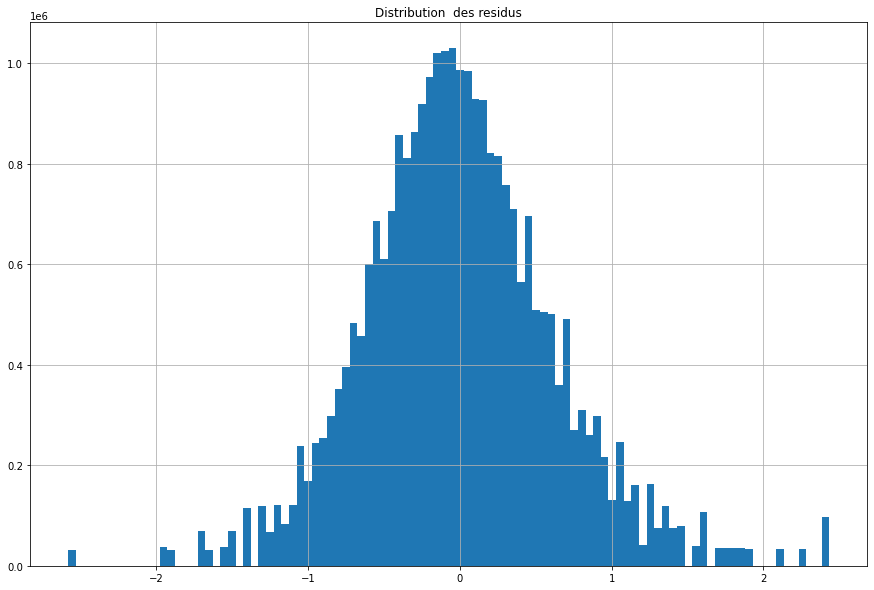

In [10]:
# Histogramme des residus
plt.figure(figsize=(15,10))
ANOVA.resid.hist(bins=100)
plt.title("Distribution  des residus")
plt.savefig('Graph/ Distribution  des residus (1)')
plt.show()

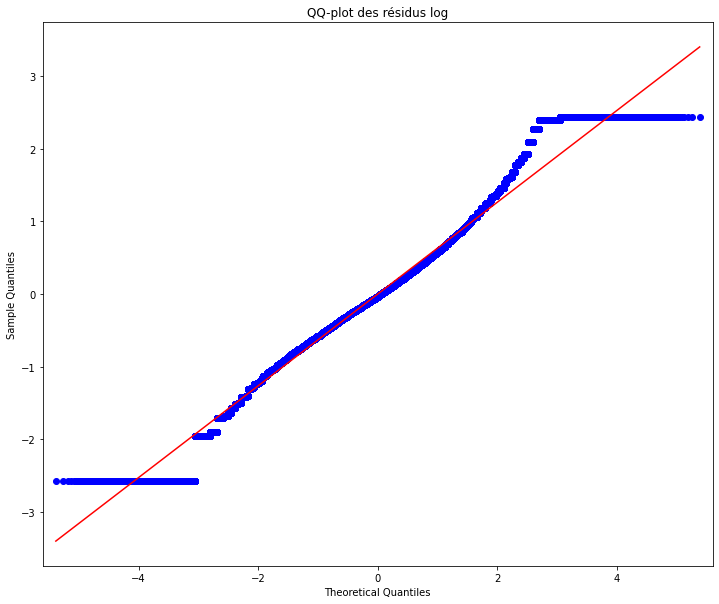

In [11]:
# Visualisation de la diagramme Henry 
fig, ax = plt.subplots(figsize=(12,10))
fig = sm.qqplot(ANOVA.resid, line="s", ax=ax)
ax.set_title('QQ-plot des résidus log')
plt.savefig('Graph/QQ-plot des résidus log')
plt.show()

 <div class ="alert alert-block alert-success">    

**Résultats :**   

    
       
La **p-valeur** étant **inferieur à 0.05** on doit **rejetter l'hypothèse $H_0$**, et affirmer que les données **ne suivent pas une distribution normale.** 

Cependant, notre test souffre de 'vice de forme fatale' Glass et Hopkins(1996) car il **repose sur l'homogeneité des variances** ,aussi, comme nous somme **en présence d'une hétérogénéité des variances** sa robustesse est remise en question.
    
De plus, L'histogramme et la droite d'Henry nous indique une distribution quasi normale. 

C'est pourquoi, eu egard au caractère robuste de notre modele linéaire et la taille de notre echantillon, on est poussé à valider les resultats de notre modele car ces propriétés sont asymptotiques.

<b>En somme, on passe outre l'hypothèse d$H_0$  des residus de notre 1er propriété et valide les resultats de notre modèle.</b> 
    
</div>

**2eme propriété**: Le test de Durbin-Watson s'élève à 0,001 ce qui signifie que nous avons une auto-corrélation positive dont les causes peuvent-être:

- Une mauvaise spécification du modèle (relations entre variables explicatives et la variable
    endogène sont de type non linéaire..) 
- Une éventuelle omission d’une variable essentielle 
- Données déjà manipulées (un lissage par moyenne mobile, interpolation des données..)

Ici, on est en présence de données déjà manipulés et effectivement, les données proviennent d'observatoires statistiques et on les a selectionnées afin d'avoir une representation de la diversité des pays dans le monde. Ce qui à pour conséquence une hétéroscedasticité des residus que nous allons verifier avec un test de Breusch-Pagan .

In [12]:
# on teste si la variance des erreurs d'une régression dépend des valeurs des variables indépendantes.Dans ce cas, il y a hétéroscédasticité.
# test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value'] 
# resultat du test
test_result = sms.het_breuschpagan(ANOVA.resid, ANOVA.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 988520.4375992402),
 ('p-value', 0.0),
 ('f-value', 205066.29562862808),
 ('f p-value', 0.0)]

La P-value est inferieur seuil 0.05 et elle est hautement significative ,Aussi, on rejette $H0$ à savoir que nous sommes en présence d'une homoscedasticité des residus. On a donc une hétéroscedasticité des résidus.

 <div class ="alert alert-block alert-success"> 

**Résultats :**    
    
Eu egard aux diffèrents pays sur lesquels nous travaillons, on a pu constater une hétéroscedasticité des residus, on va donc considérer qu'il n'existe pas d'auto-corrélation.

**En somme, les residus sont indépendants .**
</div>

**Décomposition de la variance totale expliquée par la variable pays :**

In [13]:
# Décomposition de la variance totale expliquée
def decompo_var(reg_lin) :    
    data = sm.stats.anova_lm(reg_lin, typ=1)
    ssq = data[['sum_sq']]
    ssq = np.round(100 * ssq / ssq.sum(), 3)
    ssq['sum_sq'] = ssq.sum_sq
    ssq.columns = ['Variance expliquée (%)']
    return(ssq)

decompo_var(ANOVA)

,Variance expliquée (%)
alpha3,86.812
Residual,13.188


 <div class ="alert alert-block alert-success">

**Résultats :**     
    
- On obtient une variance totale expliquée par alpha3 à 86.81 %.  
    
    
- On obtient également des résidus qui explique 13.18% de la variance.Neanmoins, cette variance ne sera pas prise en compte car elle est essentiellement due à l'hétérogeneité des pays sur lesquels on travaille et notamment à cause des fortes diffèrences entre pays comme on a pu le voir précèdemment.
        
</div>

<a id='REGMULTI'></a>
### Régression linéaire multiple avec comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu

[Haut de page](#sommaire)

<div class ="alert alert-block alert-warning">

**Remarques :**    
        
La variance influençant fortement la stabilité des resultats, on prend le partie de bien ecarter les mesures des $x$.Aussi, on va utiliser l'echantillon des pays selectionnés précèdemment et non pas la table complète car cela est très coûteux en temps et en mémoire informatique.
</div>

<div class ="alert alert-block alert-info"> 

**Infos:**
    
$ \ $ 
        
Par une Regression linéaire multiple, on va  mesurer l'influence de l'indice de Gini `G_j`, du revenu moyen du pays `M_j` puis, du `quantile parent` sur le revenu des individus `income`. On evaluera la qualité du model avec le <b>$ R^2 $</b>:
    
$ \ $ 

<b>Modele de regression linaire multiple :</b>

$ Y_i=\beta_{\alpha}+\beta_1x_{i1}+...+\beta_jx_{ij}+...+\beta_px_{ip}+ϵ_1 $       

$ \ $ 
    
<b>hypothèse residus distribués normalement et non corrélés:</b>

$ L(\epsilon_i)= N(0,\sigma^2)$              
    
$Cov(\epsilon_i \epsilon_j)= 0\forall i,j$
   
$ \ $ 
    
   
$ \ $ 
        
<b>Décomposition de la variabilité:</b>    
    
Variation totale ( Somme des carrés d'ecart totale):
$ \displaystyle\ SCT=\sum_{i=1}^{k}\sum_{j=1}^{n}(y_{ij}-\bar{y})^2 $   

$ \ $
    
Variation interclasse (Somme des carrés d'écart due au facteur):
$ \displaystyle\ SCE=\sum_{i=1}^{k}n_i(\bar y_i-\bar{y})^2 $

$ \ $ 
    
Variation intraclasse (Somme des carrés d'écart residuelle):
$ \displaystyle\ SCR=\sum_{i=1}^{k}n_is^2_i $

$ \ $  
    
    
<b>Le Coefficent de determination dans notre cas c'est $ R^2$ , car on souhaite chiffrer l'influence des variables quantitatives revenu moyen par pays`M_j`, l'indice de Gini `G_j` et ensuite en ajoutant le `quantile_parent`sur le le revenu des individus `income`: </b>   
       
$ \ $    
     
$ \displaystyle\ R^2=\frac {Vinterclasses}{Vtotale}$
       
$ \ $       
    
<b>Interprétation du test :</b>  
        
$ \ $    
    
Si $R^2=0 $  , alors, cela signifie à priori qu'il n'y pas de relation entre la variable revenu moyen du pays `M_j`,l'indice de Gini `G_j` et le revenu des individus `income`.
        
$ \ $    
        
Si $R^2=1 $ ,alors,  cela signifie qu'il existe a priori une relation entre la variable revenu moyen du pays `M_j`,l'indice de Gini `G_j` et le revenu des individus `income`.
    
    
On repetera les mesures presentés ci-dessus en incluant la variable `quantile_parent`.
 
    
</div>

- Valeurs réelles :

In [8]:
# Regression lineaire multiple avec comme variable à expliquer le revenu des individus 
# et les variables explicatives le revenu moyen du pays et l'indice de gini
reg_IgM_j = smf.ols('income ~ G_j+M_j', data=data4_select).fit()
print(reg_IgM_j.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.584e+07
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:27:55   Log-Likelihood:            -2.8955e+08
No. Observations:            27534000   AIC:                         5.791e+08
Df Residuals:                27533997   BIC:                         5.791e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    223.7967     28.912      7.741      0.0

**Numériquement:** On a obtenu une $Pvalue = 0$, il existe donc à priori une influence des variables explicatives indice de Gini et revenu moyen par pays sur la variable à expliquer le revenu des individus et notre resultat est hautement significatif.
    

En effet, on a un $ R^2=0,53 $, cela signifie à priori que notre modèle de regression explique 53% de la variance. Cependant, on va poursuivre notre investigation en appliquant un model basé sur le log du revenu des individus.

- Valeurs en Log :

In [9]:
# Regression lineaire multiple avec comme variable à expliquer le revenu des individus en log
# et les variables explicatives le revenu moyen du pays et l'indice de gini
reg_IgM_j_log = smf.ols('income ~ G_j+M_j', data=data4_select_log).fit()
print(reg_IgM_j_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 9.061e+07
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:29:25   Log-Likelihood:            -2.6426e+07
No. Observations:            27534000   AIC:                         5.285e+07
Df Residuals:                27533997   BIC:                         5.285e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2437      0.002    117.835      0.0

**Numériquement:** On a obtenu une $Pvalue = 0$, il existe donc à priori une influence des variables explicatives indice de Gini et revenu moyen par pays sur la variable à expliquer le revenu des individus et le resultat est hautement significatif.
    

En outre, on a egalement un $ R^2=0,86 $, cela signifie que notre modèle lineaire avec des valeurs en Log est mieux ajusté et notmment lorsqu'on ajoute les variables `M_j` et `G_j`.

<a id='REGMULTIANALYS'></a>
### Analyse du modèle :

[Haut de page](#sommaire)

**Analyse de l'atypicité des observations :** On va mener des analyses sur les valeurs atypiques et/ou influentes.

In [10]:
# seuil alpha des tests
alpha = 0.05
# on récupère le nombre d'individus de l'échantillon (n) et le nombre de variables (P). 
n = data4_select_log.shape[0]
p = 5

In [11]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float', inplace=True)

- Sur les variables explicatives :

Calcul des leviers : afin de detecter l'atypicité et l'influence éventuelle de certaines données, qu'on pourra eventuellement retirer.On va calculer les leviers en sachant que le seuil des leviers est de $2∗\frac{p}{n}$.

In [12]:
# Ajout variable levier
analyses['levier'] = reg_IgM_j_log.get_influence().hat_matrix_diag
# seuil de levier
seuil_levier = 2*p/n

In [13]:
# visualisation des observations
#plt.figure(figsize=(10,6))
#plt.title("Affichage des leviers",fontsize=12)
#plt.bar(analyses['obs'], analyses['levier'])
#plt.xlabel('Observation')
#plt.ylabel('Leviers')
#plt.plot([0, n], [seuil_levier, seuil_levier], color='r')
#plt.savefig('Graph/Leviers.jpg',dpi=300)
#plt.show()

In [14]:
# selection des points pour lesquels le levier est supérieur au seuil
analyses.loc[analyses['levier'] > seuil_levier, :]

,obs,levier


- Sur la variable à expliquer 

Calculez les résidus studentisés : Le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

In [15]:
# ajout variable rstudent
analyses['rstudent'] = reg_IgM_j_log.get_influence().resid_studentized_internal
# seuil de levier
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

In [16]:
# selection des points pour lesquels le levier est supérieur au seuil
analyses.loc[analyses['rstudent'] > seuil_levier, :]

,obs,levier,rstudent
13770099,13770100,7.243892e-08,0.006024
13770100,13770101,7.243892e-08,0.006024
13770101,13770102,7.243892e-08,0.006024
13770102,13770103,7.243892e-08,0.006024
13770103,13770104,7.243892e-08,0.006024
...,...,...,...
27533995,27533996,9.467806e-08,3.774526
27533996,27533997,9.467806e-08,3.774526
27533997,27533998,9.467806e-08,3.774526
27533998,27533999,9.467806e-08,3.774526


In [22]:
#plt.figure(figsize=(10,6))
#plt.bar(analyses['obs'], analyses['rstudent'])
#plt.xlabel('Observation')
#plt.ylabel('Résidus studentisés')
#plt.plot([0, n], [seuil_rstudent, seuil_rstudent], color='r')
#plt.plot([0, n], [-seuil_rstudent, -seuil_rstudent], color='r')
#plt.show()

 <div class ="alert alert-block alert-success"> 

**Résultats :** 
    
Comme on pu le voire , il n'existe pas de valeurs atypiques et/ou influentes dans les variables explicatives qui peuvent influencer les resultats de notre regression lineaire. 
    
Cependant dans les residus studentisé de la variable à expliqué on obtient des valeurs atypiques, neanmoins au vu de notre modèle.Aussi, on ne retirera pas d'observation.
    
 </div>

**Test multicolinéarité des variables explicatives avec le VIF (Variance Inflation Factor)**: On va évaluer si les facteurs sont corrélés les uns aux autres (multi-colinéarité), ce qui pourrait influencer les autres facteurs et réduire la fiabilité de notre modèle.

In [17]:
# VIF sur les variable G_j et M_j
variables = reg_IgM_j_log.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[2.364559716643409, 2.3645597166479795]

 <div class ="alert alert-block alert-success"> 

**Résultats :**

    
On obtient des valeurs fortes de non colinearité de G_j et M_j. Notre modele est a priori robuste.
 </div>

 <div class ="alert alert-block alert-warning"> 
    
<b>Remarques:</b> 
    
Certes le model logarithmique donne de meilleurs resultats qu'avec les vrais valeurs. Neanmoins, il faut que les conditions suivantes sur les résidus soient également remplies, à savoir :
    
- 1er propriété : résidus distribué normalement.
    
$ L(\epsilon_i)= N(0,\sigma^2)$ 
       

$ \ $  
        
- 2eme propriété : résidus non-corrélés.
    
$Cov(\epsilon_i \epsilon_j)= 0\forall i,j$
    
</div>

**1er propriété**: On a Prob(omnibus), à savoir la probabilité que que les résidus soient normalement distribué qui n'est pas verifié, car nous obtenons 0 ce qui indique une distribution qui n'est pas normalement distribué. Neanmoins, nous allons effectué un test d'adéquation à une distribution normale.

In [21]:
# Test Kolmogorov-Smirnov d'adéquation des residus à une distribution normale
st.kstest(reg_IgM_j_log.resid, 'norm')

KstestResult(statistic=0.13195029547400844, pvalue=0.0)

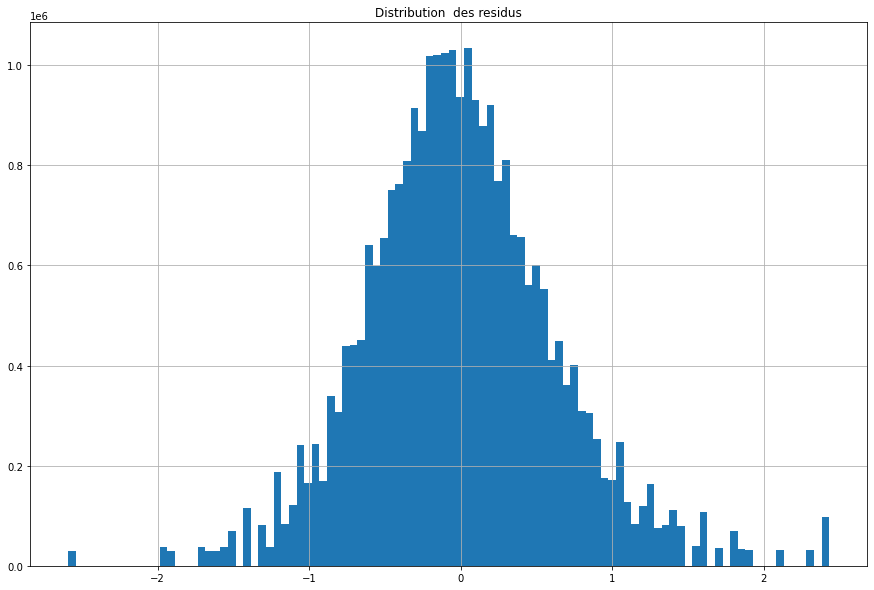

In [22]:
# Histogramme des residus
plt.figure(figsize=(15,10))
reg_IgM_j_log.resid.hist(bins=100)
plt.title("Distribution  des residus")
plt.savefig('Graph/ Distribution  des residus (2)')
plt.show()

**Graphiquement :** on observe une distribution se rapprochant fortement d'une loi normale. 

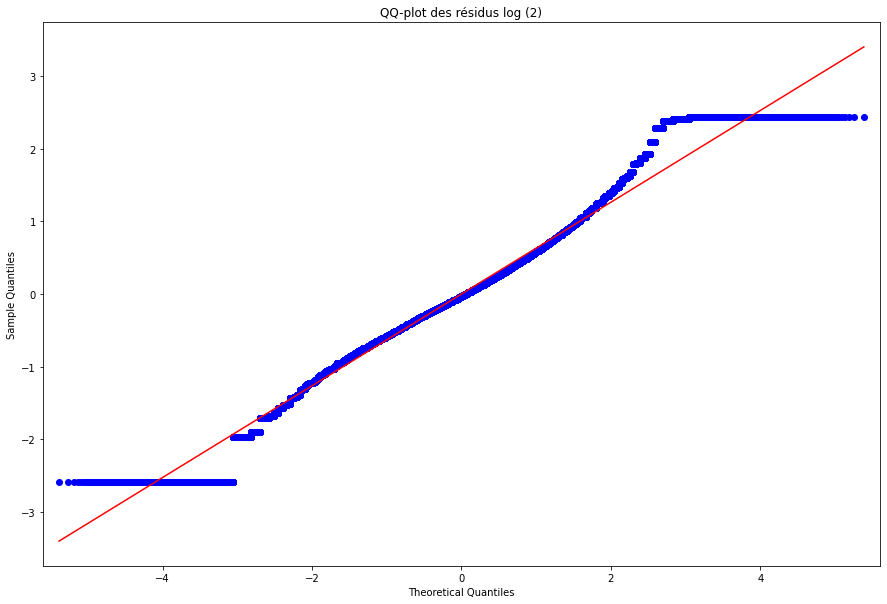

In [25]:
# Visualisation de la distribution des residus afin de verifier l'homoscédasticité
fig, ax = plt.subplots(figsize=(15,10))
fig = sm.qqplot(reg_IgM_j_log.resid, line="s", ax=ax)
ax.set_title('QQ-plot des résidus log (2)')
plt.savefig('Graph/QQ-plot des résidus log (2)')
plt.show()

 <div class ="alert alert-block alert-success">    
    

**Résultats :**    
    
La p-valeur etant inferieur à 0.05 on doit rejetter l'hypothèse $H_0$, et affirmer que les données ne suivent pas une distribution normale. 

Cependant, notre test souffre de 'vice de forme fatale' Glass et Hopkins(1996) car il repose sur l'homogeneité des variances ,aussi, comme nous somme en présence d'une hétérogénéité des variances sa robustesse est remise en question.
    
De plus,l'histogramme et la droite de Henry nous indiquent une distribution quasi normale.

C'est pourquoi, eu egard au caractère robuste de notre modele linéaire et la taille de notre echantillon, on est poussé à valider les resultats de notre modele car ces propriétés sont asymptotiques.

<b>En somme, on passe outre l'hypothèse d$H_0$  des residus de notre 1er propriété et valide les resultats de notre modèle.</b> 
    
</div>

**2eme propriété**: Le test de Durbin-Watson s'élève à 0,018 ce qui signifie que nous avons une autocorrélation positive des residus dont les causes peuvent-être:

- Une mauvaise spécification du modèle (relations entre variables explicatives et la variable
    endogène sont de type non linéaire..) 
- Une éventuelle omission d’une variable essentielle 
- Données déjà manipulées (un lissage par moyenne mobile, interpolation des données..)

Ici, on est en présence de données déjà manipulés et effectivement, les données proviennent d'observatoires statistiques et on les a selectionnées afin d'avoir une representation de la diversité des pays dans le monde. Ce qui à pour conséquence une hétéroscedasticité des residus que nous allons verifier avec un test de Breusch-Pagan .

In [26]:
# on teste si la variance des erreurs de la régression dépend des valeurs des variables indépendantes.Dans ce cas, il y a hétéroscédasticité.
# test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value'] 
# resultat du test
test_result = sms.het_breuschpagan(reg_IgM_j_log.resid, reg_IgM_j_log.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 923056.0123062638),
 ('p-value', 0.0),
 ('f-value', 477537.0141966038),
 ('f p-value', 0.0)]

La P-value est inferieur seuil 0.05 et elle est hautement significative ,Aussi, on rejette $H0$ à savoir que nous sommes en présence d'une homoscedasticité des residus. On a donc une hétéroscedasticité des résidus.

 <div class ="alert alert-block alert-success"> 

**Résultats :**
    
    
Eu egard aux diffèrents pays sur lesquels nous travaillons, on a pu constater une hétéroscedasticité des residus, on va donc considérer qu'il n'existe pas d'auto-corrélation car les pays selectionnés sont très differents.

**En somme, les residus sont indépendants et validons la 2ème propriété notre modèle.**
</div>

<a id='decomp1'></a>
**Décomposition de la variance totale expliquée par l'indice de gini, le revenu moyen par pays :**

In [27]:
# Décomposition de la variance totale expliquée
def decompo_var(reg_lin) :    
    data = sm.stats.anova_lm(reg_lin, typ=1)
    ssq = data[['sum_sq']]
    ssq = np.round(100 * ssq / ssq.sum(), 3)
    ssq['sum_sq'] = ssq.sum_sq
    ssq.columns = ['Variance expliquée (%)']
    return(ssq)

decompo_var(reg_IgM_j_log)

,Variance expliquée (%)
G_j,52.655
M_j,34.155
Residual,13.190


 <div class ="alert alert-block alert-success">
    
**Résultats :**
    
- On obtient une variance totale expliquée par `G_j` à 52.65 % et `M_j` 34.155 % . 
    
    
- On a egalement des residus qui explique 13.19% de la variance.Neanmoins, cette variance ne sera pas prise en compte car elle est essentiellement due à l'hétérogeneité des pays sur lesquels on travaille et notamment à cause des forte diffèrences entre eux comme on à pu le voir précèdemment.
    
</div>

[Haut de page](#sommaire)

<a id='decomp2'></a>
**Décomposition de la variance totale expliquée par les autres facteurs non considérés dans le modèle :** 

In [28]:
# Regression lineaire multiple avec comme variable à expliquer le revenu des individus en log
# et les variables explicatives le revenu moyen du pays, l'indice de gini et le facteur coeficient d'elasticité P_j
reg_IgM_j_log_f = smf.ols('income ~ G_j+M_j+P_j', data=data4_select_log).fit()
print(reg_IgM_j_log_f.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 6.041e+07
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:12:23   Log-Likelihood:            -2.6425e+07
No. Observations:            27534000   AIC:                         5.285e+07
Df Residuals:                27533996   BIC:                         5.285e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2740      0.002    121.826      0.0

**Numériquement:** On a obtenu une $Pvalue = 0$, il existe donc à priori une influence des variables explicatives indice de Gini, revenu moyen et du coef d'elasticité par pays sur la variable à expliquer le revenu des individus et le resultat est hautement significatif.
    
En outre, on a egalement un $ R^2=0,86 $, cela signifie que notre modèle lineaire avec des valeurs en Log est mieux ajusté et cependant lorsqu'on ajoute la variable `P_j` aucune amélioration n'est a noter.

In [29]:
# Décomposition de la variance
def decompo_var(reg_lin) :    
    data = sm.stats.anova_lm(reg_lin, typ=1)
    ssq = data[['sum_sq']]
    ssq = np.round(100 * ssq / ssq.sum(), 3)
    ssq['sum_sq'] = ssq.sum_sq
    ssq.columns = ['Variance expliquée (%)']
    return(ssq)
    
decompo_var(reg_IgM_j_log_f)

,Variance expliquée (%)
G_j,52.655
M_j,34.155
P_j,0.001
Residual,13.189


 <div class ="alert alert-block alert-success">
    
**Résultats :**
    
En utilisant le coefficient d'élasticité, on a constaté aucune amèlioration du modèle.
    
</div>

<a id='REGMULTIQ'></a>
### Régression linéaire multiple en ajoutant le quantile parent

[Haut de page](#sommaire)

In [30]:
# Changement dtype de la variable quantile en décimale
data4_select_log['c_i_parent'] = data4_select_log['c_i_parent'].astype(float)

In [31]:
# Regression avec la variable expliquatives quantile en plus de l'indice de gini et le revenus moyen du pays
reg_IgMq_log = smf.ols('income ~ G_j+M_j+P_j+c_i_parent', data=data4_select_log).fit()
print(reg_IgMq_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 4.655e+07
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:16:19   Log-Likelihood:            -2.6100e+07
No. Observations:            27534000   AIC:                         5.220e+07
Df Residuals:                27533995   BIC:                         5.220e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0986      0.002     44.164      0.0

**Numériquement:** On a obtenu une $Pvalue = 0$, il existe donc à priori une influence des variables explicatives indice de Gini, revenu moyen par pays et quantile parents sur la variable à expliquer le revenu des individus. Le resultat est hautement significatif.
    

En outre, on a egalement un $ R^2=0,87 $, cela signifie cela signifie que notre modèle lineaire avec des valeurs en Log est mieux ajusté et notamment lorsqu'on ajoute la variable `C_i_parent`.

<a id='REGMULTIANALYS2'></a>
### Analyse du modèle :

[Haut de page](#sommaire)

**Analyse de l'atypicité des observations :** On va mener des analyses sur les valeurs atypiques et/ou influentes.

In [32]:
# seuil alpha des tests
alpha = 0.05
# on récupère le nombre d'individus de l'échantillon (n) et le nombre de variables (P). 
n = data4_select_log.shape[0]
p = 5

In [33]:
analyses_2 = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float', inplace=True)

- Sur la variable à expliquer 

Calcul des leviers : afin de detecter l'atypicité et l'influence éventuelle de certaines données, qu'on pourra eventuellement retirer.On peut calculer les leviers en sachant que le seuil des leviers est de $2∗\frac{p}{n}$.

In [34]:
# Ajout variable levier
analyses_2['levier'] = reg_IgMq_log.get_influence().hat_matrix_diag
# seuil de levier
seuil_levier = 2*p/n

In [35]:
# selection des points pour lesquels le levier est supérieur au seuil
analyses_2.loc[analyses_2['levier'] > seuil_levier, :]

,obs,levier


In [ ]:
# visualisation des observations
#plt.figure(figsize=(10,6))
#plt.bar(analyses_2['obs'], analyses_2['levier'])
#plt.xlabel('Observation')
#plt.ylabel('Leviers')
#plt.plot([0, n], [seuil_levier, seuil_levier], color='r')
#plt.show()

- Sur la variable à expliquer

Calcule des résidus studentisés : Le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

In [36]:
# ajout variable rstudent
analyses_2['rstudent'] = reg_IgMq_log.get_influence().resid_studentized_internal
# seuil de levier
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

In [37]:
# selection des points pour lesquels le levier est supérieur au seuil
analyses_2.loc[analyses_2['rstudent'] > seuil_levier, :]

,obs,levier,rstudent
9675297,9675298,2.520063e-07,0.010869
9675298,9675299,2.474038e-07,0.005308
9675891,9675892,2.520063e-07,0.010869
9675892,9675893,2.474038e-07,0.005308
9676485,9676486,2.520063e-07,0.010869
...,...,...,...
27533995,27533996,2.770784e-07,3.576582
27533996,27533997,2.813985e-07,3.571020
27533997,27533998,2.858124e-07,3.565459
27533998,27533999,2.903203e-07,3.559898


In [ ]:
#plt.figure(figsize=(10,6))
#plt.bar(analyses['obs'], analyses['rstudent'])
#plt.xlabel('Observation')
#plt.ylabel('Résidus studentisés')
#plt.plot([0, n], [seuil_rstudent, seuil_rstudent], color='r')
#plt.plot([0, n], [-seuil_rstudent, -seuil_rstudent], color='r')
#plt.show()

 <div class ="alert alert-block alert-success"> 

**Résultats :** 
    
Comme on pu le voire , il n'existe pas de valeurs atypiques et/ou influentes dans les variables explicatives qui peuvent influencer les resultats de notre regression lineaire. 
    
Cependant dans les residus studentisé de la variable à expliqué on obtient des valeurs atypiques, neanmoins au vu de notre modèle.Aussi, on ne retirera pas d'observation.
    

 </div>

**Test multicolinéarité des variables avec le VIF (Variance Inflation Factor)**: on va évaluer si les facteurs sont corrélés les uns aux autres (multi-colinéarité), ce qui pourrait influencer les autres facteurs et réduire la fiabilité de notre modèle.

In [39]:
variables_2 = reg_IgMq_log.model.exog
[variance_inflation_factor(variables_2, i) for i in np.arange(1,variables_2.shape[1])]

[3.098406404859746, 4.180850929455659, 5.304206345737674, 0.9999999999999558]

In [ ]:
# VIF pour quantile parent c_i_parent
variance_inflation_factor(data4_select_log[['G_j', 'M_j','P_j','c_i_parent']].values, 3)

 <div class ="alert alert-block alert-success"> 

**Résultats :**
    
On obtient des resultats de non corrélation moderé pour `M_j`,`C_i_parent`,`G_j`, et `P_j`, les valeurs sont comprise entre 1 et 6  . À priori, notre modèle est convenable.
 </div>

 <div class ="alert alert-block alert-warning"> 
    
<b>Remarques:</b> 
    
Certes le model logarithmique donne de meilleurs resultats qu'avec les vrais valeurs. Neanmoins, il faut que les conditions suivantes sur les résidus soient également remplies, à savoir :
    
- 1er propriété : résidus distribué normalement.
    
$ L(\epsilon_i)= N(0,\sigma^2)$ 
       

$ \ $  
        
- 2eme propriété : résidus non-corrélés.
    
$Cov(\epsilon_i \epsilon_j)= 0\forall i,j$
    
</div>

**1er propriété**: On a Prob(omnibus), à savoir la probabilité que que les résidus soient normalement distribué qui n'est pas verifié, car nous obtenons 0 ce qui indique une distribution qui n'est pas normalement distribué. Nous avons donc une hétéroscédasticité de la distribution des residus. Neanmoins, nous allons effectué un test d'adéquation à une distribution normale.

In [40]:
# Test Kolmogorov-Smirnov d'adéquation des residus à une distribution normale
st.kstest(reg_IgMq_log.resid, 'norm')

KstestResult(statistic=0.13118294682190412, pvalue=0.0)

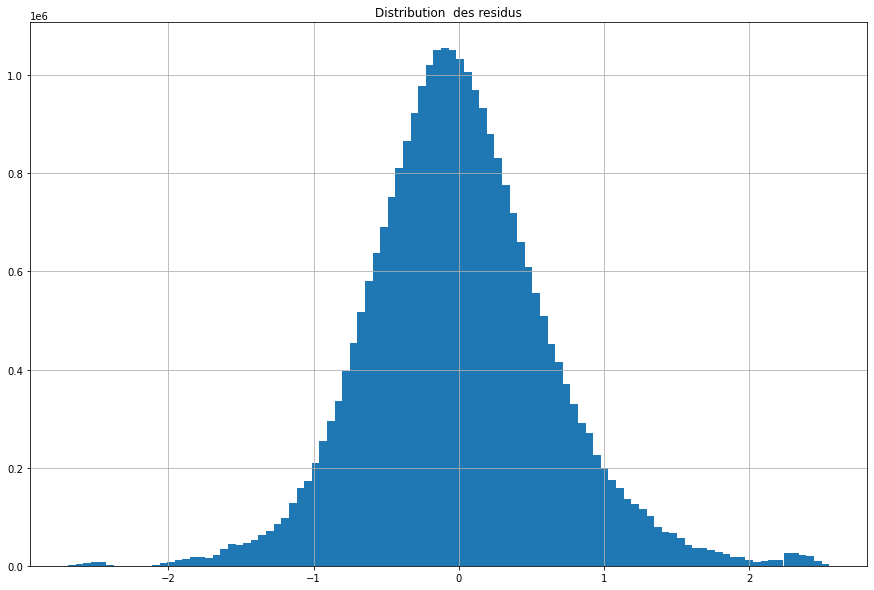

In [41]:
# Histogramme des residus
plt.figure(figsize=(15,10))
reg_IgMq_log.resid.hist(bins=100)
plt.title("Distribution  des residus")
plt.savefig('Graph/ Distribution  des residus (3)')
plt.show()

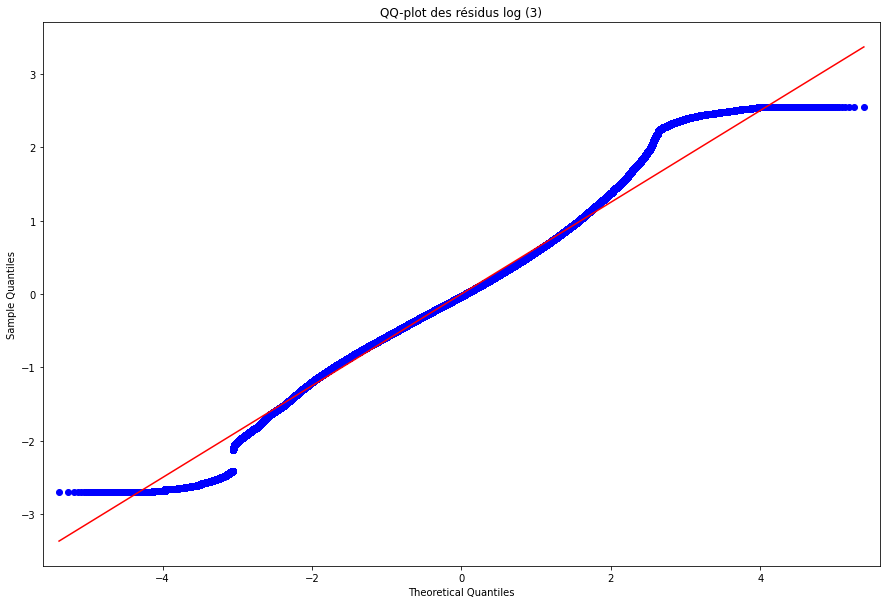

In [42]:
# Visualisation de la distribution des residus 
fig, ax = plt.subplots(figsize=(15,10))
fig = sm.qqplot(reg_IgMq_log.resid, line="s", ax=ax)
ax.set_title('QQ-plot des résidus log (3)')
plt.savefig('Graph/QQ-plot des résidus log (3)')
plt.show()

 <div class ="alert alert-block alert-success">    
    
**Résultats :**
    
La p-valeur etant inferieur au seuil 0.05, on doit rejetter l'hypothèse $H_0$, et affirmer que les données ne suivent pas une distribution normale. 

Cependant, notre test souffre de 'vice de forme fatale' Glass et Hopkins(1996) car il repose sur l'homogeneité des variances ,aussi, comme nous somme en présence d'une hétérogénéité des variances sa robustesse est remise en question.
    
De plus,l'histogramme et la droite de Henry nous indiquent une distribution quasi normale.

C'est pourquoi, eu egard au caractère robuste de notre modele linéaire et la taille de notre echantillon, on est poussé à valider les resultats de notre modele car ces propriétés sont asymptotiques.

<b>En somme, on passe outre l'hypothèse $H_0$ des residus de notre 1er propriété et valide les resultats de notre modèle.</b> 
    
</div>

**2eme propriété**: Le test de Durbin-Watson s'élève à 0,019 ce qui signifie que nous avons une auto-corrélation positive des residus dont les causes peuvent-être:

- Une mauvaise spécification du modèle (relations entre variables explicatives et la variable
    endogène sont de type non linéaire..) 
- Une éventuelle omission d’une variable essentielle 
- Données déjà manipulées (un lissage par moyenne mobile, interpolation des données..)

Ici, on est en présence de données déjà manipulés et effectivement, les données proviennent d'observatoires statistiques et on les a selectionnées afin d'avoir une representation de la diversité des pays dans le monde. Ce qui à pour conséquence une hétéroscedasticité des residus que nous allons verifier avec un test de Breusch-Pagan .

In [43]:
# test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value'] 
# resultat du test
test_result = sms.het_breuschpagan(reg_IgMq_log.resid, reg_IgMq_log.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 1000791.5149985462),
 ('p-value', 0.0),
 ('f-value', 259634.90794553715),
 ('f p-value', 0.0)]

La P-value est inferieur seuil 0.05 et elle est hautement significative ,Aussi, on rejette $H0$ à savoir que nous sommes en présence d'une homoscedasticité des residus. On a donc une hétéroscedasticité des résidus.

 <div class ="alert alert-block alert-success"> 

Eu egard aux diffèrents pays sur lesquels nous travaillons, on a pu constater une hétéroscedasticité des residus, on va donc considérer qu'il n'existe pas d'auto-corrélation car les pays selectionnés sont très differents.

**En somme, les residus sont indépendants et validons la 2ème propriété notre modèle.**
</div>

**Décomposition de la variance totale expliquée par l'indice de gini, le revenu moyen par pays, coeficient d'élasticité et le quantile parents :**

[Haut de page](#sommaire)

In [44]:
# Décomposition de la variance totale expliquée
def decompo_var(reg_lin) :    
    data = sm.stats.anova_lm(reg_lin, typ=1)
    ssq = data[['sum_sq']]
    ssq = np.round(100 * ssq / ssq.sum(), 3)
    ssq['sum_sq'] = ssq.sum_sq
    ssq.columns = ['Variance expliquée (%)']
    return(ssq)
decompo_var(reg_IgMq_log)

,Variance expliquée (%)
G_j,52.655
M_j,34.155
P_j,0.001
c_i_parent,0.308
Residual,12.881


 <div class ="alert alert-block alert-success">
    
    
- On obtient une variance totale expliquée par `G_j` à 52.65 %, `M_j` 34.15 %, seulement 0.001 % par `P_j` et par `c_I_parent`0.30%.    
        
    
- On obtient egalement des residus qui explique 12.88 % de la variance. Neanmoins, cette variance ne sera pas prise en compte car elle est essentiellement due à l'hétérogeneité des pays sur lesquels on travaille et notamment à cause des fortes diffèrences entre eux comme on a pu le voir précèdemment.
    
    
</div>

<a id='M4Q'></a>
**QUESTION: En observant le coefficient de régression associé à l’indice de Gini, peut-on affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise ?**

[Haut de page](#sommaire)

In [49]:
# Regression avec la variable expliquatives quantile en plus de l'indice de gini et le revenus moyen du pays
reg_IgMq_log = smf.ols('income ~ G_j+M_j+c_i_parent+alpha3', data=data4_select_log).fit()
print(reg_IgMq_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 2.328e+07
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:57:15   Log-Likelihood:            -2.6099e+07
No. Observations:            27534000   AIC:                         5.220e+07
Df Residuals:                27533991   BIC:                         5.220e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.769e+07   8.58e+07      1.139

**Numériquement:** On a obtenu une $Pvalue = 0$, il existe donc à priori une influence de la variable explicative revenu des individus sur la variable à expliquer l'indice de Gini. Le resultat est hautement significatif.
    

Certes, on a une amélioration du $ R^2= 0.87 $, ce qui signifie que notre modèle lineaire avec des valeurs en Log est mieux ajusté.

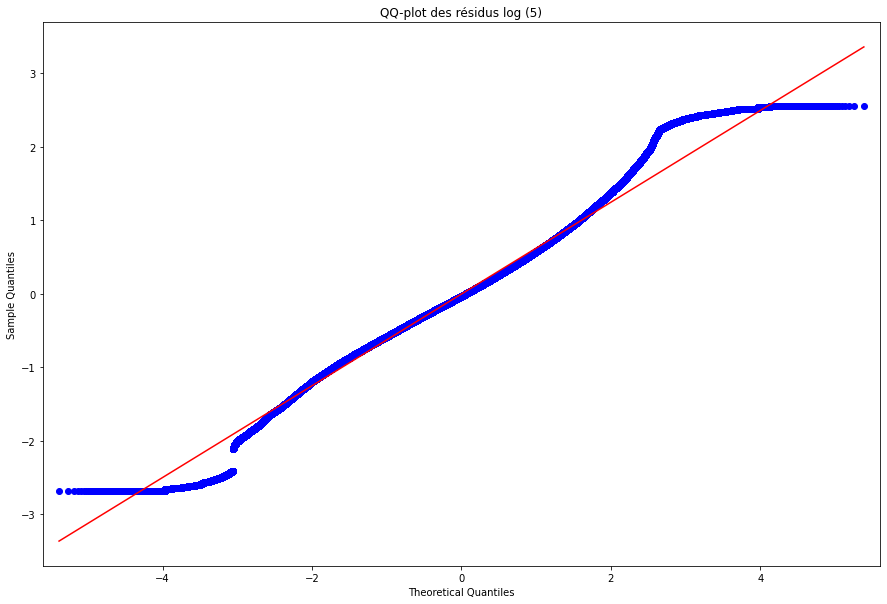

In [46]:
# Visualisation de la distribution des residus afin de verifier l'homoscédasticité
fig, ax = plt.subplots(figsize=(15,10))
fig = sm.qqplot(reg_IgMq_log.resid, line="s", ax=ax)
ax.set_title('QQ-plot des résidus log (5)')
plt.savefig('graph/QQ-plot des résidus log (5)')
plt.show()

 <div class ="alert alert-block alert-success">


**Résultats :**    
    
       
Le résultat du coefficent de `G_j` est négatif $coef= -3.07$. On a donc une relation de la variable dependante revenu des individus et de la variable independante indice de Gini inverse.C'est à dire que lorsque l'une augmente, l'autre diminue.

    
En somme, une unité de changement dans la variable `G_j` augmente la variable`income`.
    
    
**On peut affirmer que le fait de vivre dans un pays plus inégalitaire défavorise plus qu'il ne favorise.**
    
</div>

<a id='decomp3'></a>
**Décomposition de la variance total expliqué par le pays de naissance et le revenu des parents :**

[Haut de page](#sommaire)

In [50]:
# decomposition de la variance
def decompo_var(reg_lin) :    
    data = sm.stats.anova_lm(reg_lin, typ=1)
    ssq = data[['sum_sq']]
    ssq = np.round(100 * ssq / ssq.sum(), 3)
    ssq['sum_sq'] = ssq.sum_sq
    ssq.columns = ['Variance expliquée (%)']
    return(ssq)
decompo_var(reg_IgMq_log)

,Variance expliquée (%)
alpha3,86.812
G_j,0.000
M_j,0.000
c_i_parent,0.308
Residual,12.880


 <div class ="alert alert-block alert-success">

    
**Résultats :**
    
On obtient une variance totale expliquée par alpha3 de 86.81 % et de 0.30 % par le quantile parent. On à egalement 12.88% par les residus.
    
    
</div>

<a id='decomp4'></a>
**Décomposition de la variance totale expliquée par les autres facteurs non considérés dans le modèle :** 

[Haut de page](#sommaire)

In [51]:
# Regression avec la variable expliquatives quantile en plus de l'indice de gini et le revenus moyen du pays
reg_IgMq_log = smf.ols('income ~ G_j+M_j+c_i_parent+alpha3+P_j', data=data4_select_log).fit()
print(reg_IgMq_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 2.069e+07
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:02:04   Log-Likelihood:            -2.6099e+07
No. Observations:            27534000   AIC:                         5.220e+07
Df Residuals:                27533990   BIC:                         5.220e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.427e+07   1.05e+08      0.517

**Numériquement:** On a obtenu une $Pvalue = 0$, il existe donc à priori une influence des variables explicatives pays de naissance, le revenu et le coefficent d'elasticité des individus sur la variable à expliquer l'indice de Gini. Le resultat est hautement significatif.
    

On a egalement un $ R^2= 0.87 $, cela signifie que notre modèle lineaire est moins opportun en ajoutant la variable `P_j` car il ne l'amèliore pas.

Aussi, on ne va pas conserver `P_j` sur ce modèle.

In [53]:
# Décomposition de la variance
def decompo_var(reg_lin) :    
    data = sm.stats.anova_lm(reg_lin, typ=1)
    ssq = data[['sum_sq']]
    ssq = np.round(100 * ssq / ssq.sum(), 3)
    ssq['sum_sq'] = ssq.sum_sq
    ssq.columns = ['Variance expliquée (%)']
    return(ssq)
    
decompo_var(reg_IgMq_log)

,Variance expliquée (%)
alpha3,86.812
G_j,0.000
M_j,0.000
c_i_parent,0.308
P_j,0.000
Residual,12.880


 <div class ="alert alert-block alert-success">
 
**Résultat :** 
    
L'ajout du facteur `P_j` ne modifie pas la variance expliquée et la qualité du modèle reste identique au précèdent.
    
</div>

 <div class ="alert alert-block alert-success">

**CONCLUSION:** 
      
$ \ $     
    
On a lu, compris, traité et visualisé les données.Ensuite, on a effectué une régression linéaire simple et multiple, puis, analysé les models.    
$ \ $   
Tout au long de ce projet, on a opéré des choix quant aux valeurs à ajouter,supprimer, garder et séléctionner pour le nettoyage et la préparation des données, mais aussi lors de la missions 4 sur les valeurs à utiliser pour la regression. L'objectif recherché durant le projet etait d'apporter la solution la plus adéquat eu egard aux problèmatiques rencontrés à chaque étape.    
$ \ $     
    
En somme, on a pu construire un modele avec des regressions simples et multiples et on a obtenu des resultats plutôt satisfaisants sur certains modèles, neanmoins, il est nécessaire de poursuivre les investigations et notamment pour obtenir de bonnes prédictions.
       
</div>

#### RÉFÈRENCES :

https://read.oecd-ilibrary.org/social-issues-migration-health/l-ascenseur-social-en-panne-comment-promouvoir-la-mobilite-sociale_bc38f798-fr#page16

https://www.european-datalab.com/une-forte-mobilite-intergenerationnelle-dans-les-pays-nordiques/

https://www.openicpsr.org/openicpsr/project/113172/version/V1/view

https://www.strategie.gouv.fr/point-de-vue/mobilite-sociale-france-sait-vraiment

http://eric.univ-lyon2.fr/~ricco/cours/cours/econometrie_regression.pdf

http://tutoriels-data-mining.blogspot.com/search/label/Régression

http://wikistat.fr/pdf/st-m-modlin-regsim.pdf

http://wikistat.fr/pdf/st-m-modlin-regmult.pdf

http://wikistat.fr/pdf/st-m-modlin-anacova.pdf

https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes/5754176-calculez-le-coefficient-de-determination

https://openclassrooms.com/fr/courses/4525296-maitrisez-les-bases-des-probabilites/exercises/2693

https://www.statology.org/breusch-pagan-test-python/